In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_familiarity_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "norm_familiarity_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are not contains 'DVA' in their name or config.MOVIE
# features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,Blinks_Per_Minute,Blinks_Duration_Mean,Blinks_Duration_Median,Blink_Variability,Blinks_Duration_Min,Blinks_Duration_Max,Fixations_Count,Fixations_Rate,Fixations_Duration_Mean,...,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Median_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post,DVA_Sem_Fixations_Post,DVA_AUC_Fixations_Post
0,33,-37.500000,34.188034,66.666667,-44.796771,66.666667,-33.333333,0.000000,0.000000,-7.755397,...,-57.357699,-10.830262,2.078786,40.446422,50.401408,-29.164803,9.633851,62.010250,-15.335746,14.923460
1,8,NaN,NaN,NaN,NaN,NaN,NaN,18.367347,18.367347,-23.497718,...,-69.709180,11.343919,6.964994,-6.843522,-20.358380,-20.803241,0.293156,23.538812,-30.744443,17.911679
2,47,50.000000,0.000000,0.000000,NaN,0.000000,0.000000,8.771930,8.771930,-3.512142,...,-35.048813,28.448580,-14.069278,-22.357766,-27.350588,32.609258,19.105400,16.370440,16.412071,16.282677
3,25,-81.818182,-80.000000,0.000000,-100.000000,0.000000,-90.909091,18.181818,18.181818,-23.706937,...,-8.770329,1.061286,13.924542,-5.312438,-22.570051,-8.169709,19.272294,51.718180,-17.864491,15.511606
4,12,-89.473684,86.851211,92.156863,66.002803,95.000000,67.741935,3.703704,3.703704,-14.251401,...,32.046874,-59.201075,17.647052,3.190553,13.899583,26.539763,-0.141678,1.244069,29.667178,-5.312271


In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Columns: 173 entries, Movie to DVA_AUC_Fixations_Post
dtypes: float64(172), int8(1)
memory usage: 812.3 KB


In [5]:
labels_df.head()

,familiarity
series_id,
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


In [6]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   familiarity  604 non-null    float64
dtypes: float64(1)
memory usage: 9.4 KB


Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [7]:
print('Number of missing values in each column:', features_df.isin([np.nan, np.inf, -np.inf]).sum(axis=0).sort_values(ascending=False).head(10))

Number of missing values in each column: Mean_Pupil_Fixations_First_Diff_Post           446
Mean_Pupil_Fixations_ReEntry_Mean_Diff_Post    445
Duration_Std_Fixations_In_RoI_Pre              443
Duration_Sem_Fixations_In_RoI_Pre              443
Start_Time_Std_Fixations_In_RoI_Pre            442
Start_Time_Sem_Fixations_In_RoI_Pre            442
Mean_Pupil_Fixations_First_Diff_Pre            441
Mean_Pupil_Fixations_ReEntry_Mean_Diff_Pre     438
Duration_Std_Saccades_Start_In_RoI_Pre         415
Duration_Sem_Saccades_Start_In_RoI_Pre         415
dtype: int64


Remove columns with more than 30% missing values or inf values

In [8]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [9]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

Gaze_In_out_RoI_Ratio_Pre                 0.298013
Gaze_Re_Entries_To_RoI_Count_Pre          0.298013
Gaze_Re_Entries_To_RoI_Rate_Pre           0.298013
Gaze_Counts_In_RoI_Pre                    0.298013
Fixations_Re_Entries_To_RoI_Count_Post    0.253311
Fixations_Re_Entries_To_RoI_Rate_Post     0.253311
Fixations_Counts_In_RoI_Post              0.238411
Fixations_In_out_RoI_Ratio_Post           0.238411
Saccades_Start_In_out_RoI_Ratio_Post      0.235099
Saccades_Start_Counts_In_RoI_Post         0.235099
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [10]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

66     0.283784
421    0.270270
338    0.256757
378    0.243243
74     0.243243
310    0.243243
334    0.229730
157    0.229730
218    0.229730
571    0.216216
dtype: float64

Remove rows with more than 50% missing values

In [11]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [12]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

66     0.283784
421    0.270270
338    0.256757
378    0.243243
74     0.243243
310    0.243243
334    0.229730
157    0.229730
218    0.229730
571    0.216216
dtype: float64

Subject-wise or leave-one-subject-out (LOSO) cross-validation

Leave-One-Subject-Out Cross-Validation (LOSO CV):
- For each fold of the cross-validation, data from N-1 participants are used for training, and the data from the remaining participant is used for testing.
- This process is repeated N times (for each participant), ensuring that each participant's data is used as a test set exactly once.
- This method ensures that the model generalizes well across different participants.

In [13]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_series_id_df.pkl"))

# remove the corresponding rows from y_train
series_id_df = series_id_df.loc[series_id_df.index.isin(features_df.index)]

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Order the list of subject IDs alphabetically
subject_ids = np.sort(subject_ids)

# Create groups of subject IDs
groups = series_id_df[config.SUBJECT].values

# Print the groups
print(groups)

['AE24' 'CG62' 'MG07' 'YT92' 'KE46' 'AW35' 'MA36' 'AE24' 'AP21' 'GH44'
 'CG62' 'AP21' 'ND46' 'CD91' 'YG31' 'CD91' 'NZ19' 'TW82' 'OK15' 'NF76'
 'NP15' 'AP21' 'NP15' 'ND46' 'AW35' 'ZF67' 'GH44' 'MG07' 'CD91' 'GH44'
 'BP55' 'UD25' 'MM08' 'ND46' 'NF76' 'CG62' 'ZF67' 'ND46' 'MM08' 'CG62'
 'NZ19' 'OK15' 'TB29' 'UD25' 'AW35' 'CD91' 'BP55' 'ZF67' 'MM08' 'NA43'
 'ND46' 'AM32' 'ND46' 'TW82' 'OK15' 'RL69' 'AE24' 'YG31' 'BP55' 'YG31'
 'CD91' 'ET81' 'NF76' 'NE69' 'LD74' 'CG62' 'UD25' 'TL57' 'YK24' 'YT92'
 'YK24' 'NA43' 'AM32' 'ET81' 'TS39' 'LD74' 'YK24' 'AW35' 'AW35' 'NF76'
 'MG07' 'BP55' 'YT92' 'AE24' 'YK24' 'CD91' 'RF42' 'YT92' 'TL57' 'LD74'
 'YK24' 'AE24' 'NP15' 'YK24' 'AW35' 'ZF67' 'LD74' 'MA36' 'BP55' 'TL57'
 'NA43' 'CD91' 'RL69' 'YG31' 'ET81' 'ET81' 'TW82' 'TL57' 'MG07' 'TL57'
 'RF42' 'OK15' 'NA43' 'RF42' 'YT92' 'RF42' 'RL69' 'TW82' 'KE46' 'NF76'
 'TW82' 'NP15' 'TS39' 'MM08' 'LD74' 'RF42' 'YT92' 'TS39' 'RL69' 'TL57'
 'GH44' 'YT92' 'NE69' 'NF76' 'ND46' 'TS39' 'AW35' 'YT92' 'KE46' 'NA43'
 'NE69

In [14]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
def logistic_regression_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 15)
    PENALTY = ['l1', 'l2']
    SOLVER = ['liblinear', 'saga']
    
    LR_PARAM_GRID  = {
        'C': C,
        'penalty': PENALTY,
        'solver': SOLVER
    }
    
    return GridSearchCV(estimator=LogisticRegression(), param_grid=LR_PARAM_GRID, verbose=0)


In [16]:
# Gradient Boosting:

def gradient_boosting_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 4)
    N_ESTIMATORS = range(100, 150, 5)
    
    GB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=GB_PARAM_GRID, verbose=0)

In [17]:
# SVM:

def svm_model_searcher():
    # Define the range of values for each hyperparameter
    C = np.linspace(0.01, 1, 10)
    KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
    GAMMA = ['scale', 'auto']
    
    SVM_PARAM_GRID  = {
        'C': C,
        'kernel': KERNEL,
        'gamma': GAMMA
    }
    
    return GridSearchCV(estimator=SVC(), param_grid=SVM_PARAM_GRID, verbose=0)

In [18]:
# Random Forest:

def random_forest_model_searcher():
    # Define the range of values for each hyperparameter
    N_ESTIMATORS = range(50, 140, 10)
    MAX_DEPTH = range(2, 5)
    MIN_SAMPLES_SPLIT = range(2, 4)
    MIN_SAMPLES_LEAF = range(1, 3)
    
    RF_PARAM_GRID  = {
        'n_estimators': N_ESTIMATORS,
        'max_depth': MAX_DEPTH,
        'min_samples_split': MIN_SAMPLES_SPLIT,
        'min_samples_leaf': MIN_SAMPLES_LEAF
    }
    
    return GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_PARAM_GRID, verbose=0)

In [19]:
# XGBoost model

def xgboost_model_searcher():
    # Define the range of values for each hyperparameter
    LEARNING_RATE = np.linspace(0.05, 0.5, 5)
    MAX_DEPTH = range(2, 5)
    N_ESTIMATORS = range(100, 150, 5)
    
    XGB_PARAM_GRID  = {
        'learning_rate': LEARNING_RATE,
        'max_depth': MAX_DEPTH,
        'n_estimators': N_ESTIMATORS
    }
    
    return GridSearchCV(estimator=XGBClassifier(), param_grid=XGB_PARAM_GRID, verbose=0)

In [20]:
classifiers = {
    'SVM': svm_model_searcher(),
    'Gradient Boosting': gradient_boosting_model_searcher(),
    # 'Random Forest': random_forest_model_searcher(),
    # 'Logistic Regression': logistic_regression_model_searcher(),
    'XGBoost': xgboost_model_searcher()
}

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()
    
    return confusion_mat

SVM on AE24
Accuracy: 0.81
Precision: 1.0
Recall: 0.67
F1-score: 0.8
ROC-AUC score: 0.83


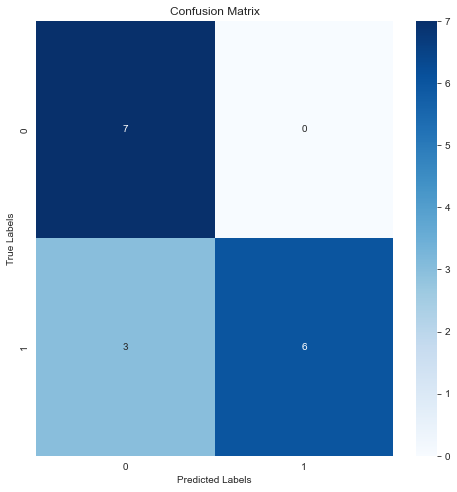

SVM on AM32
Accuracy: 0.39
Precision: 0.33
Recall: 0.22
F1-score: 0.27
ROC-AUC score: 0.39


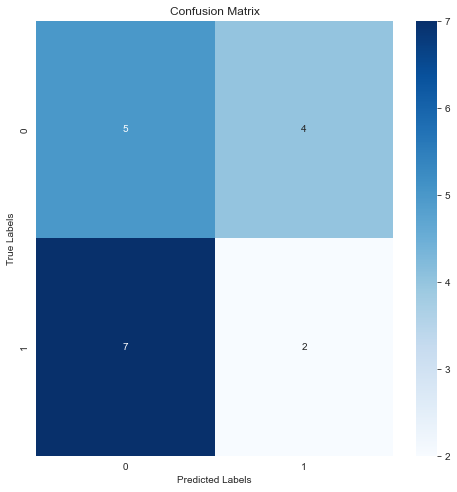

SVM on AP21
Accuracy: 0.71
Precision: 0.83
Recall: 0.62
F1-score: 0.71
ROC-AUC score: 0.73


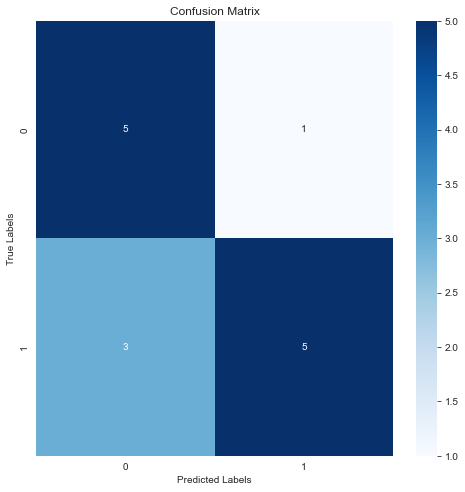

SVM on AW35
Accuracy: 0.5
Precision: 0.5
Recall: 0.18
F1-score: 0.27
ROC-AUC score: 0.5


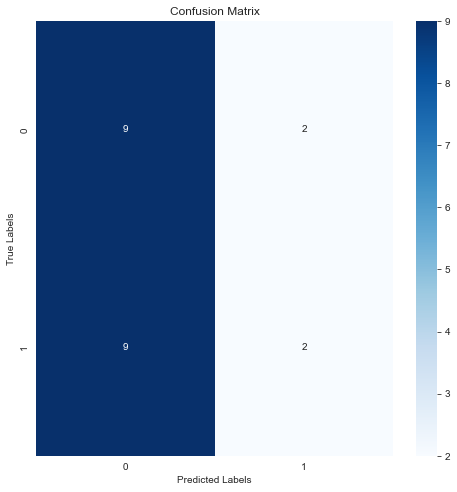

SVM on BP55
Accuracy: 0.46
Precision: 0.5
Recall: 0.21
F1-score: 0.3
ROC-AUC score: 0.48


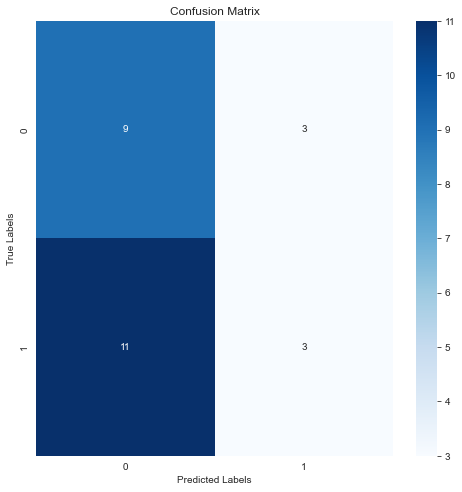

SVM on CD91
Accuracy: 0.71
Precision: 1.0
Recall: 0.14
F1-score: 0.25
ROC-AUC score: 0.57


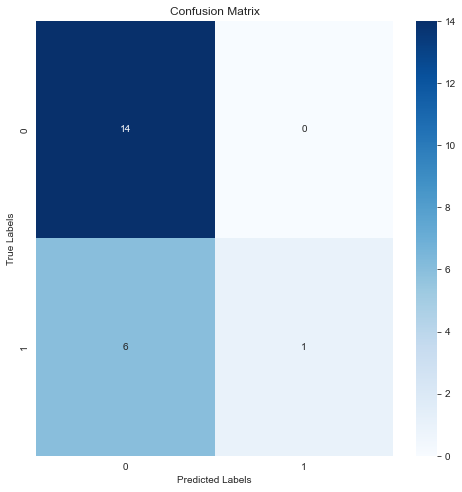

SVM on CG62
Accuracy: 0.5
Precision: 0.62
Recall: 0.36
F1-score: 0.45
ROC-AUC score: 0.53


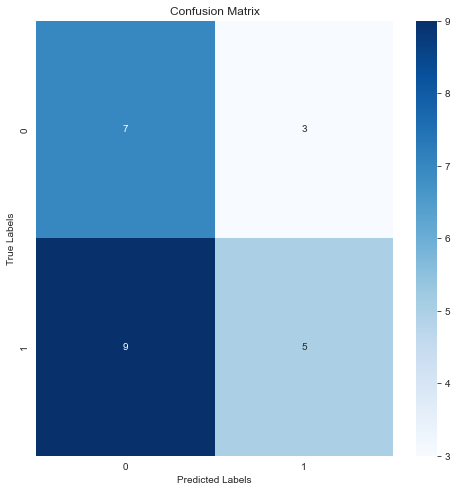

SVM on ET81
Accuracy: 0.61
Precision: 0.75
Recall: 0.33
F1-score: 0.46
ROC-AUC score: 0.61


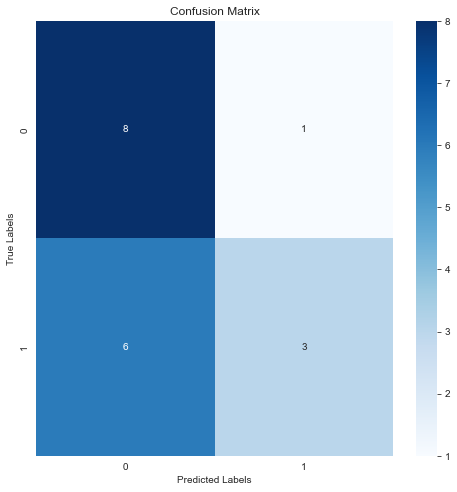

SVM on GH44
Accuracy: 0.67
Precision: 0.5
Recall: 0.5
F1-score: 0.5
ROC-AUC score: 0.62


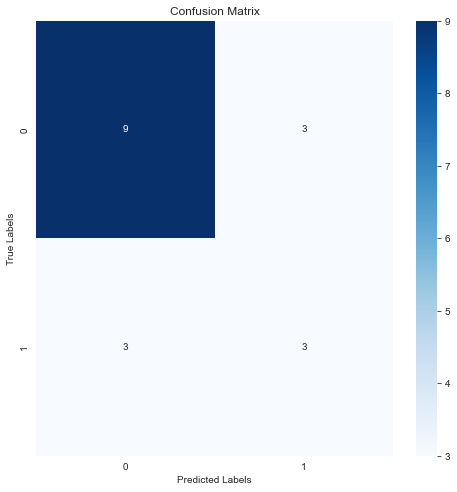

SVM on KE46
Accuracy: 0.57
Precision: 0.4
Recall: 0.5
F1-score: 0.44
ROC-AUC score: 0.55


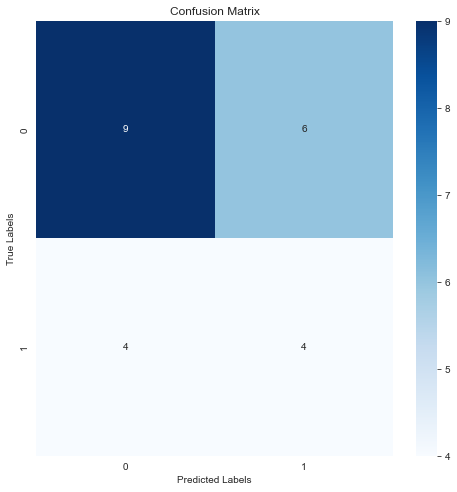

SVM on LD74
Accuracy: 0.48
Precision: 0.38
Recall: 0.33
F1-score: 0.35
ROC-AUC score: 0.46


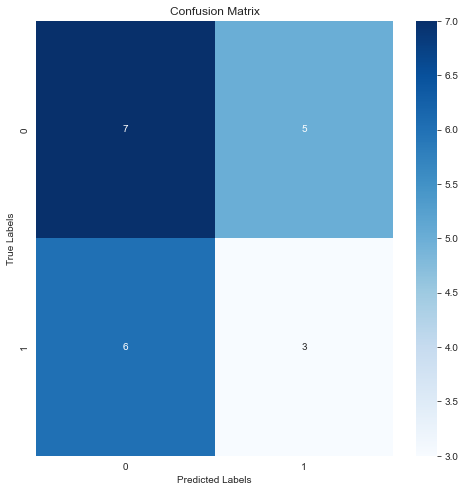

SVM on MA36
Accuracy: 0.4
Precision: 0.67
Recall: 0.2
F1-score: 0.31
ROC-AUC score: 0.5


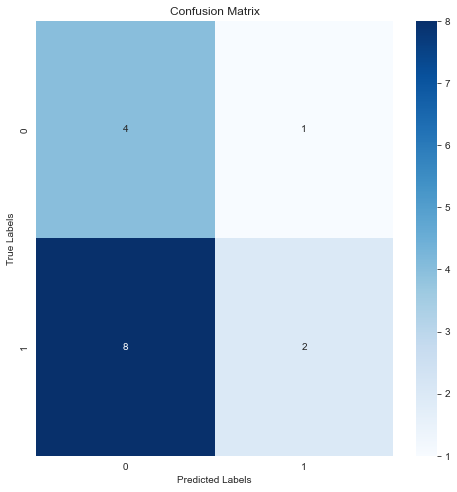

SVM on MG07
Accuracy: 0.69
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.69


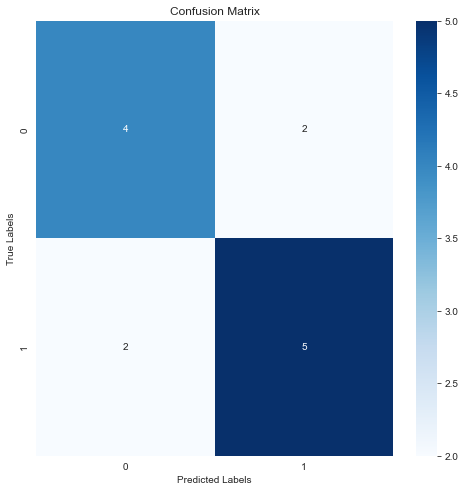

SVM on MM08
Accuracy: 0.54
Precision: 0.6
Recall: 0.43
F1-score: 0.5
ROC-AUC score: 0.55


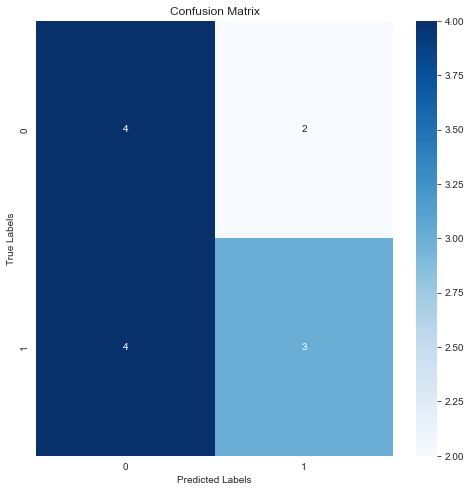

SVM on NA43
Accuracy: 0.59
Precision: 0.2
Recall: 0.25
F1-score: 0.22
ROC-AUC score: 0.47


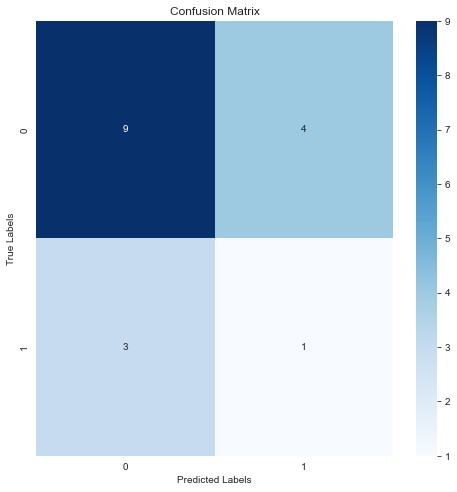

SVM on ND46
Accuracy: 0.56
Precision: 0.33
Recall: 0.2
F1-score: 0.25
ROC-AUC score: 0.48


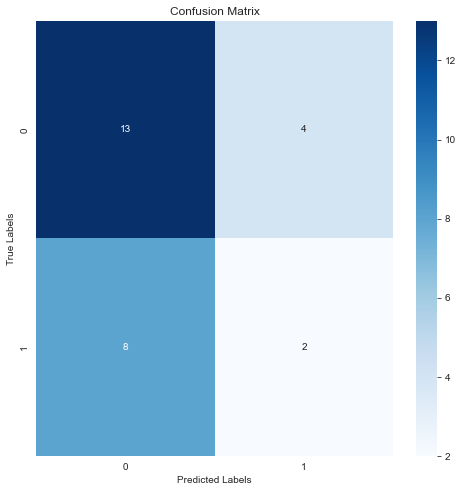

SVM on NE69
Accuracy: 0.71
Precision: 0.62
Recall: 0.56
F1-score: 0.59
ROC-AUC score: 0.68


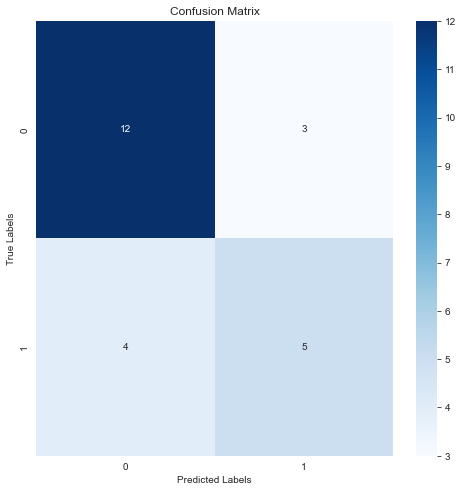

SVM on NF76
Accuracy: 0.47
Precision: 0.33
Recall: 0.29
F1-score: 0.31
ROC-AUC score: 0.44


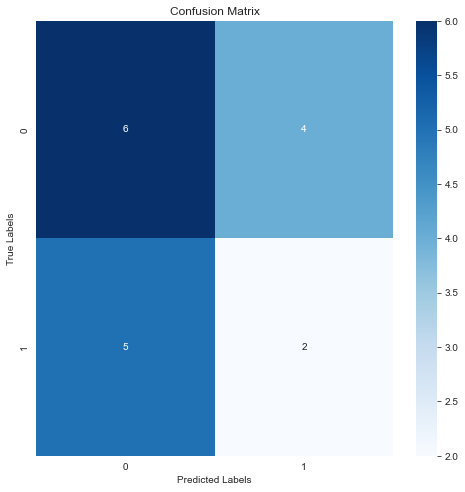

SVM on NP15
Accuracy: 0.38
Precision: 0.57
Recall: 0.36
F1-score: 0.44
ROC-AUC score: 0.38


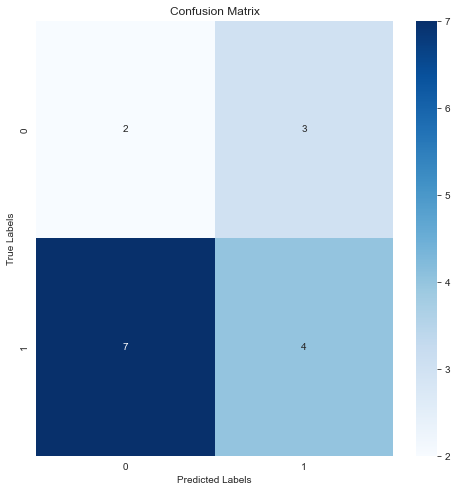

SVM on NZ19
Accuracy: 0.82
Precision: 0.75
Recall: 0.86
F1-score: 0.8
ROC-AUC score: 0.83


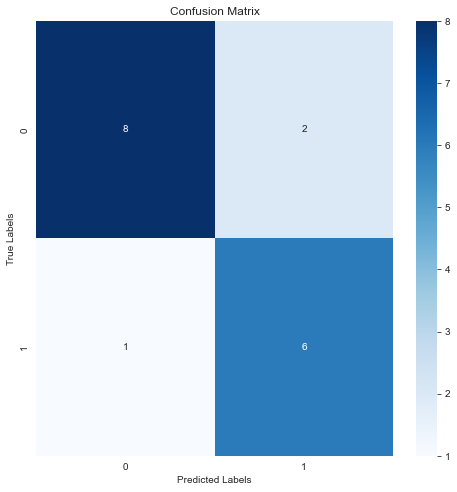

SVM on OK15
Accuracy: 0.37
Precision: 0.17
Recall: 0.12
F1-score: 0.14
ROC-AUC score: 0.34


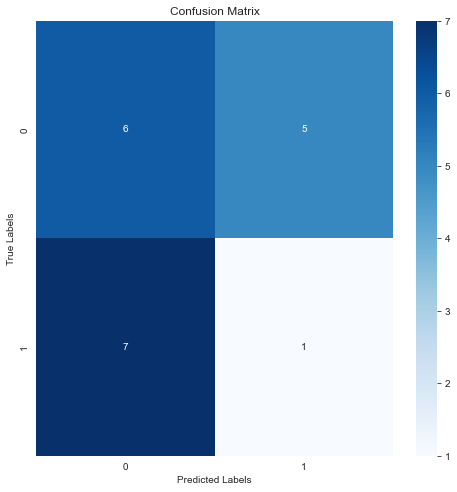

SVM on RF42
Accuracy: 0.25
Precision: 0.25
Recall: 0.33
F1-score: 0.29
ROC-AUC score: 0.26


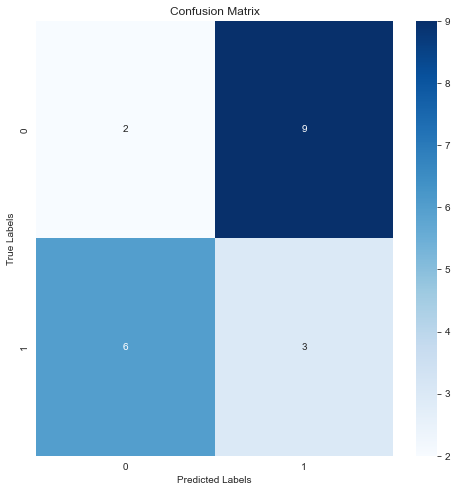

SVM on RL69
Accuracy: 0.63
Precision: 0.67
Recall: 0.25
F1-score: 0.36
ROC-AUC score: 0.58


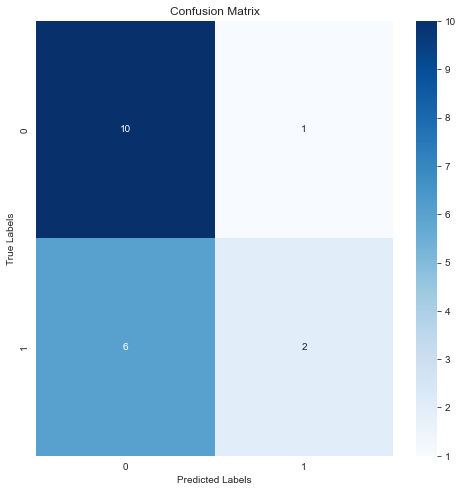

SVM on TB29
Accuracy: 0.61
Precision: 0.71
Recall: 0.5
F1-score: 0.59
ROC-AUC score: 0.62


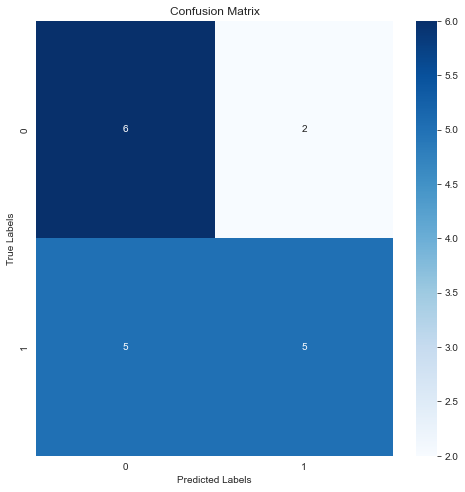

SVM on TL57
Accuracy: 0.71
Precision: 0.83
Recall: 0.56
F1-score: 0.67
ROC-AUC score: 0.72


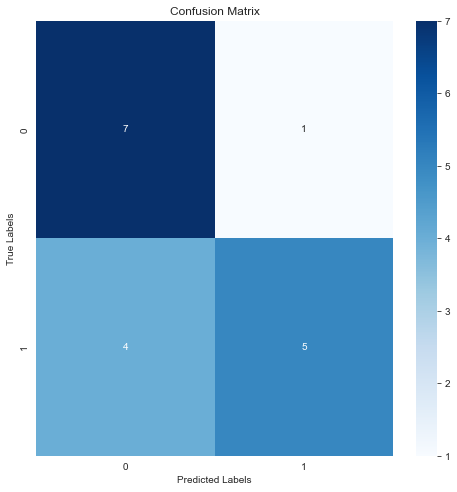

SVM on TS39
Accuracy: 0.61
Precision: 1.0
Recall: 0.18
F1-score: 0.31
ROC-AUC score: 0.59


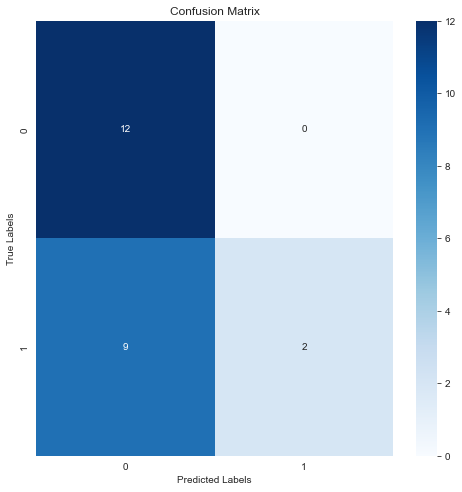

SVM on TW82
Accuracy: 0.5
Precision: 0.67
Recall: 0.22
F1-score: 0.33
ROC-AUC score: 0.54


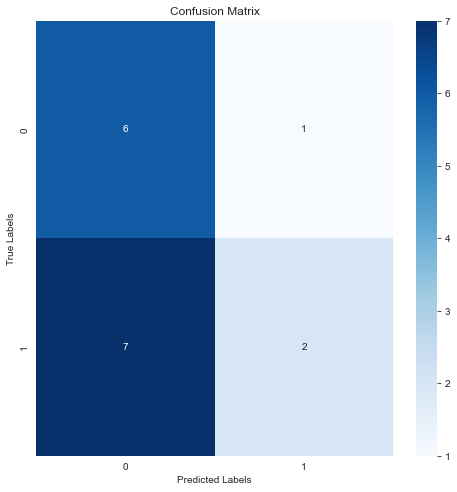

SVM on UD25
Accuracy: 0.5
Precision: 0.33
Recall: 0.43
F1-score: 0.38
ROC-AUC score: 0.48


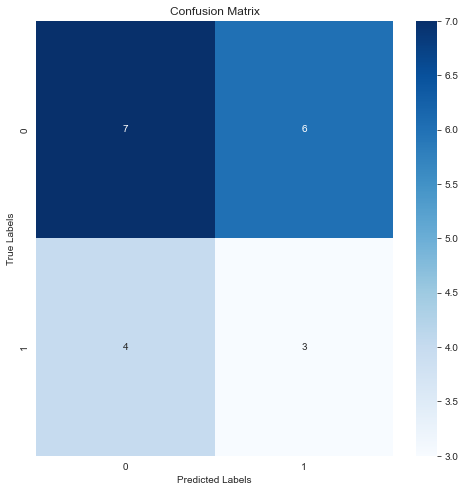

SVM on YG31
Accuracy: 0.5
Precision: 0.33
Recall: 0.2
F1-score: 0.25
ROC-AUC score: 0.46


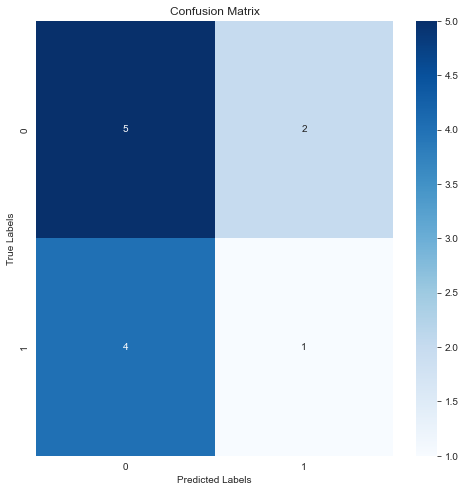

SVM on YK24
Accuracy: 0.41
Precision: 0.33
Recall: 0.25
F1-score: 0.29
ROC-AUC score: 0.4


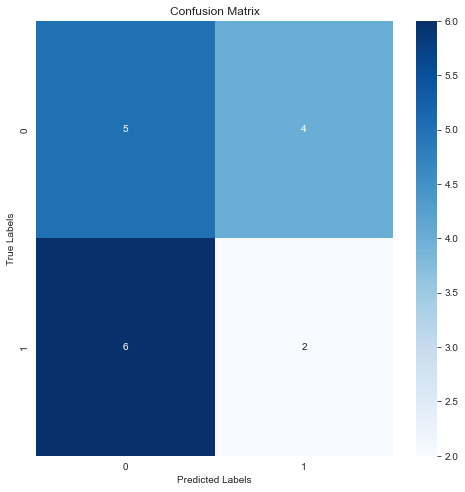

SVM on YT92
Accuracy: 0.52
Precision: 0.5
Recall: 0.33
F1-score: 0.4
ROC-AUC score: 0.51


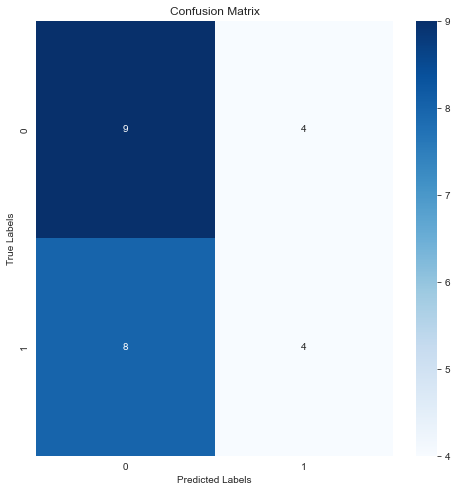

SVM on ZF67
Accuracy: 0.61
Precision: 0.5
Recall: 0.14
F1-score: 0.22
ROC-AUC score: 0.53


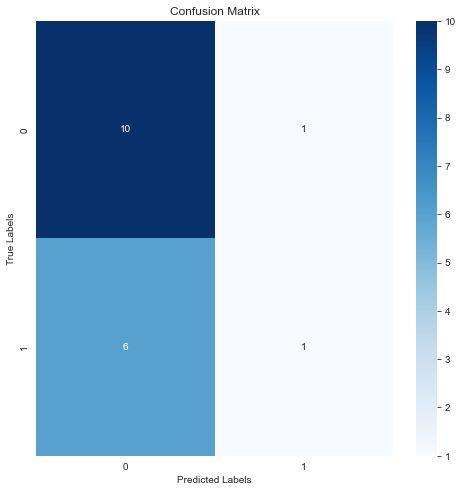

Average accuracy of SVM: 0.5557
Average confusion matrix of SVM: [[7.375   2.78125]
 [5.65625 3.0625 ]]
Gradient Boosting on AE24
Accuracy: 0.62
Precision: 0.8
Recall: 0.44
F1-score: 0.57
ROC-AUC score: 0.65


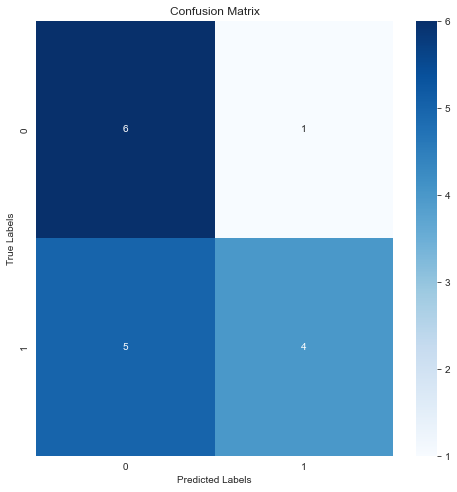

Gradient Boosting on AM32
Accuracy: 0.44
Precision: 0.43
Recall: 0.33
F1-score: 0.38
ROC-AUC score: 0.44


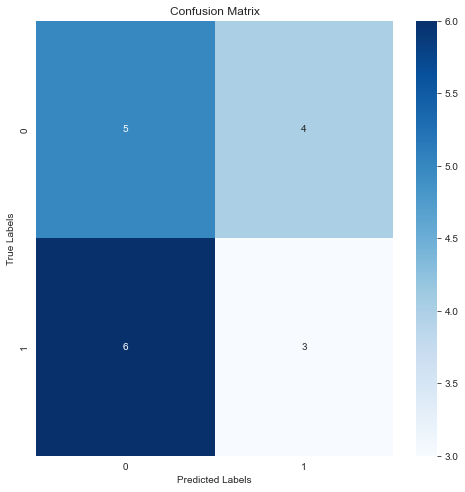

Gradient Boosting on AP21
Accuracy: 0.57
Precision: 0.67
Recall: 0.5
F1-score: 0.57
ROC-AUC score: 0.58


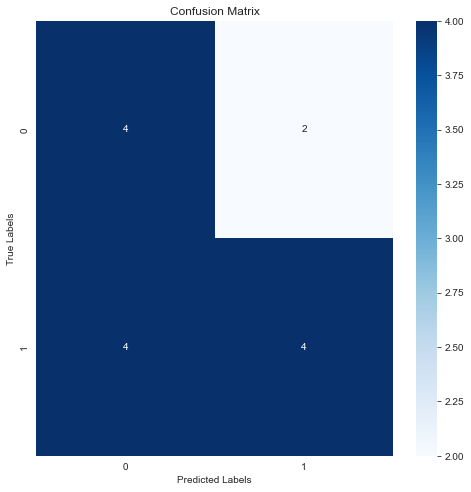

Gradient Boosting on AW35
Accuracy: 0.55
Precision: 0.6
Recall: 0.27
F1-score: 0.37
ROC-AUC score: 0.55


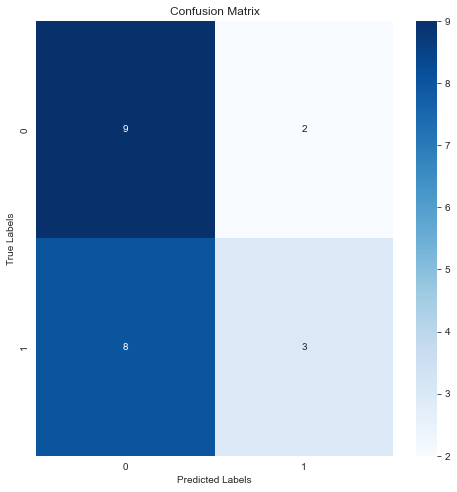

Gradient Boosting on BP55
Accuracy: 0.58
Precision: 0.71
Recall: 0.36
F1-score: 0.48
ROC-AUC score: 0.6


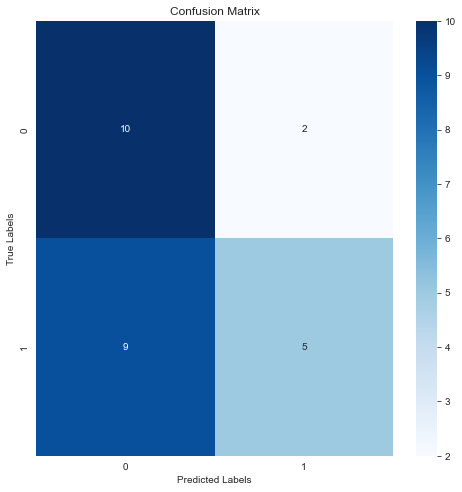

Gradient Boosting on CD91
Accuracy: 0.52
Precision: 0.29
Recall: 0.29
F1-score: 0.29
ROC-AUC score: 0.46


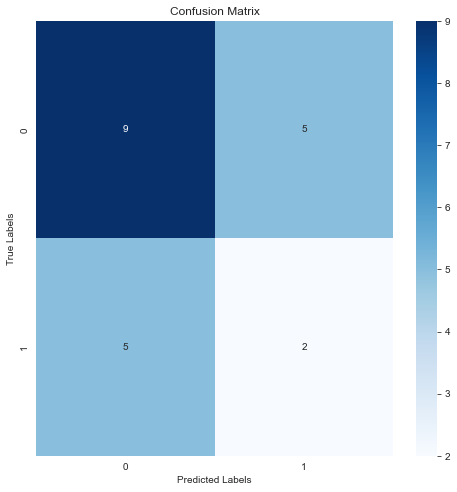

Gradient Boosting on CG62
Accuracy: 0.71
Precision: 0.89
Recall: 0.57
F1-score: 0.7
ROC-AUC score: 0.74


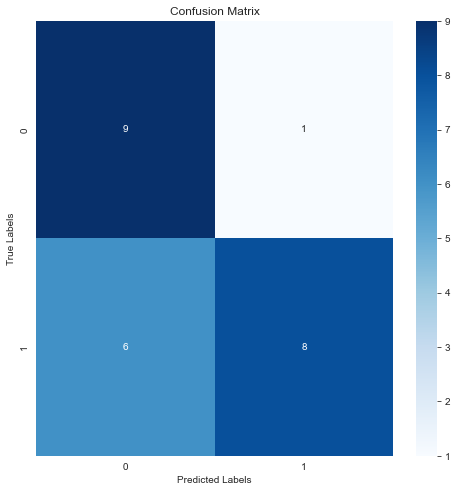

Gradient Boosting on ET81
Accuracy: 0.72
Precision: 0.75
Recall: 0.67
F1-score: 0.71
ROC-AUC score: 0.72


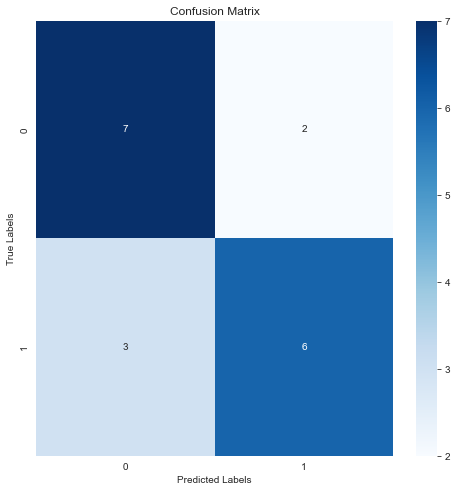

Gradient Boosting on GH44
Accuracy: 0.56
Precision: 0.4
Recall: 0.67
F1-score: 0.5
ROC-AUC score: 0.58


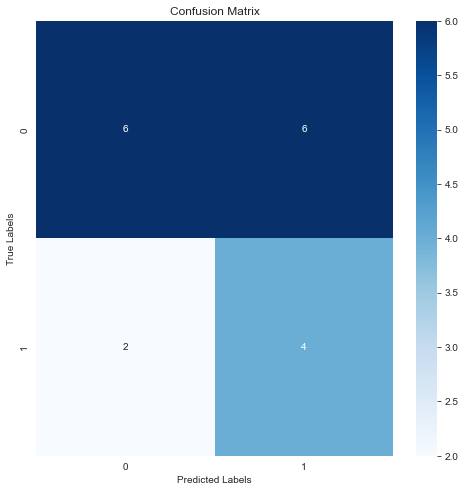

Gradient Boosting on KE46
Accuracy: 0.43
Precision: 0.22
Recall: 0.25
F1-score: 0.24
ROC-AUC score: 0.39


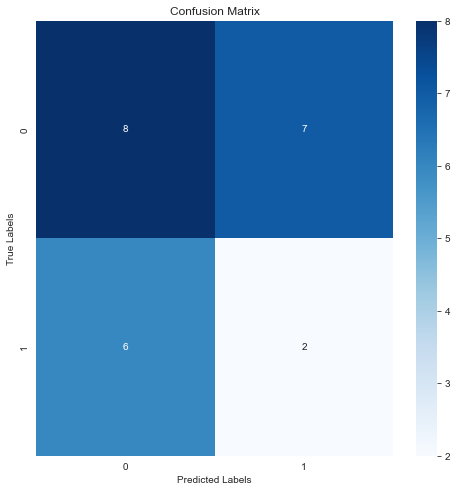

Gradient Boosting on LD74
Accuracy: 0.62
Precision: 0.56
Recall: 0.56
F1-score: 0.56
ROC-AUC score: 0.61


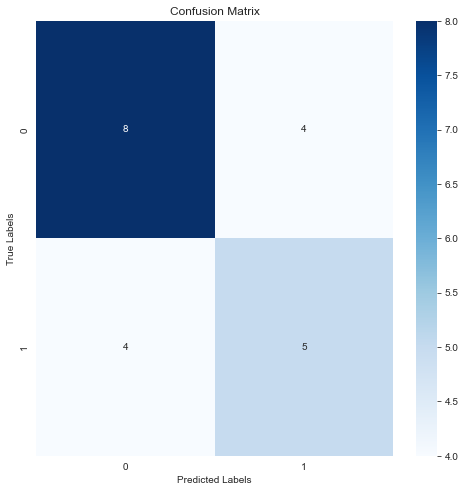

Gradient Boosting on MA36
Accuracy: 0.4
Precision: 0.67
Recall: 0.2
F1-score: 0.31
ROC-AUC score: 0.5


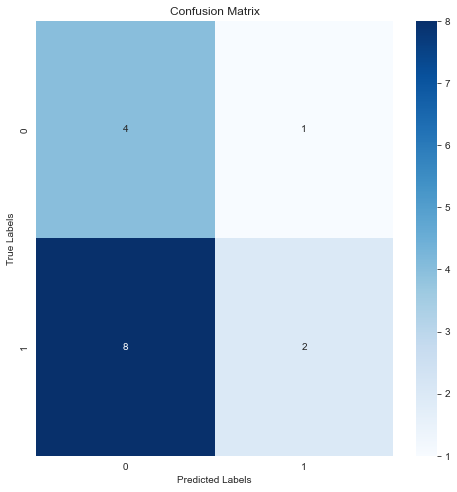

Gradient Boosting on MG07
Accuracy: 0.69
Precision: 0.67
Recall: 0.86
F1-score: 0.75
ROC-AUC score: 0.68


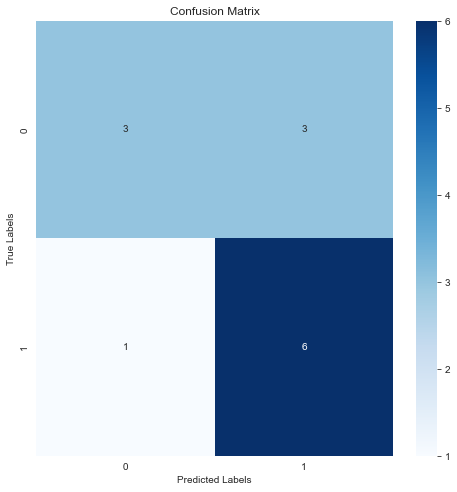

Gradient Boosting on MM08
Accuracy: 0.54
Precision: 0.57
Recall: 0.57
F1-score: 0.57
ROC-AUC score: 0.54


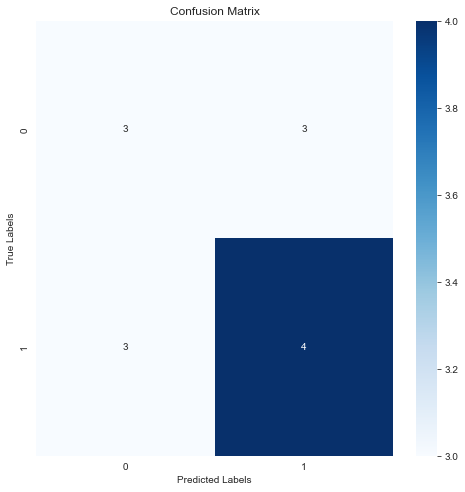

Gradient Boosting on NA43
Accuracy: 0.53
Precision: 0.17
Recall: 0.25
F1-score: 0.2
ROC-AUC score: 0.43


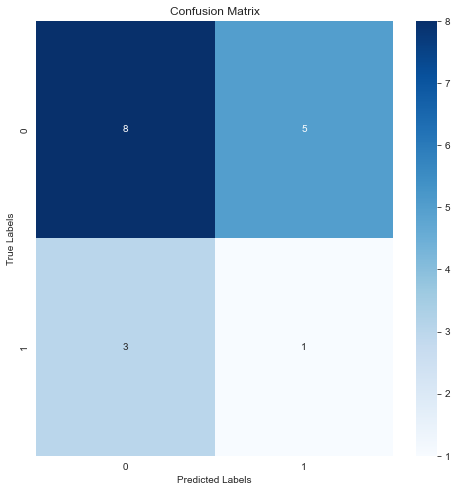

Gradient Boosting on ND46
Accuracy: 0.7
Precision: 0.62
Recall: 0.5
F1-score: 0.56
ROC-AUC score: 0.66


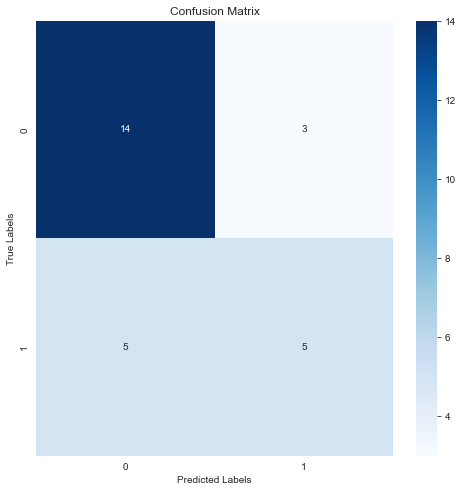

Gradient Boosting on NE69
Accuracy: 0.58
Precision: 0.46
Recall: 0.67
F1-score: 0.55
ROC-AUC score: 0.6


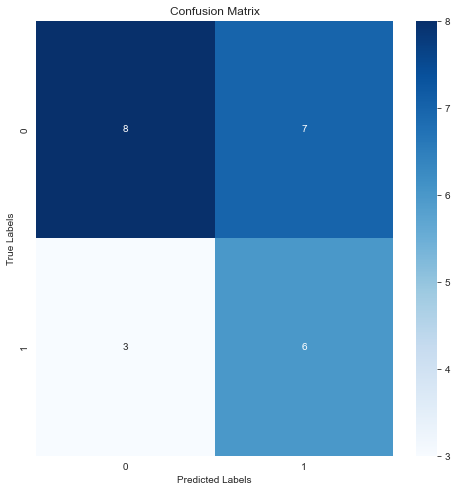

Gradient Boosting on NF76
Accuracy: 0.76
Precision: 0.8
Recall: 0.57
F1-score: 0.67
ROC-AUC score: 0.74


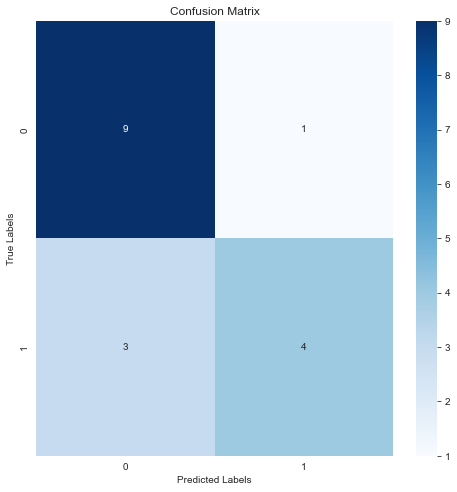

Gradient Boosting on NP15
Accuracy: 0.25
Precision: 0.4
Recall: 0.18
F1-score: 0.25
ROC-AUC score: 0.29


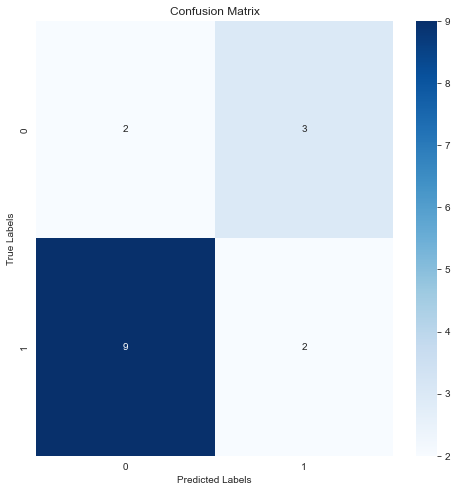

Gradient Boosting on NZ19
Accuracy: 0.76
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.76


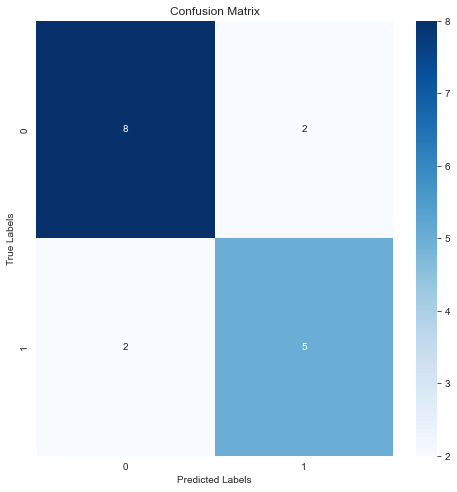

Gradient Boosting on OK15
Accuracy: 0.74
Precision: 0.67
Recall: 0.75
F1-score: 0.71
ROC-AUC score: 0.74


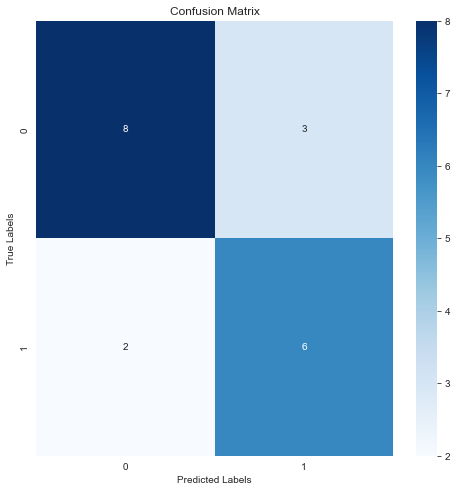

Gradient Boosting on RF42
Accuracy: 0.6
Precision: 0.55
Recall: 0.67
F1-score: 0.6
ROC-AUC score: 0.61


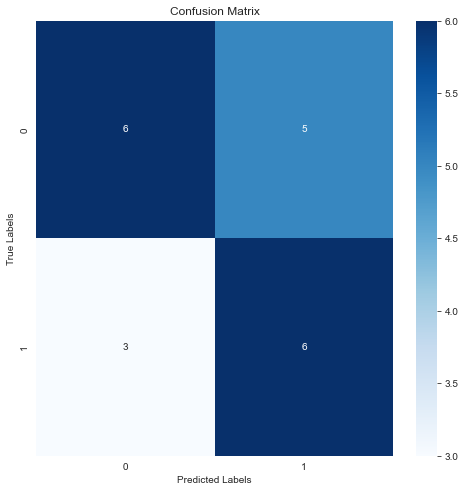

Gradient Boosting on RL69
Accuracy: 0.63
Precision: 0.57
Recall: 0.5
F1-score: 0.53
ROC-AUC score: 0.61


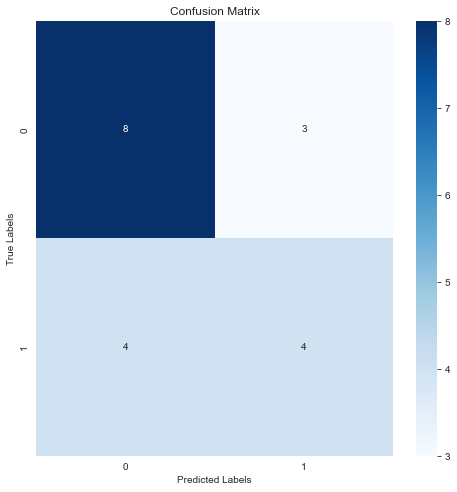

Gradient Boosting on TB29
Accuracy: 0.67
Precision: 0.75
Recall: 0.6
F1-score: 0.67
ROC-AUC score: 0.68


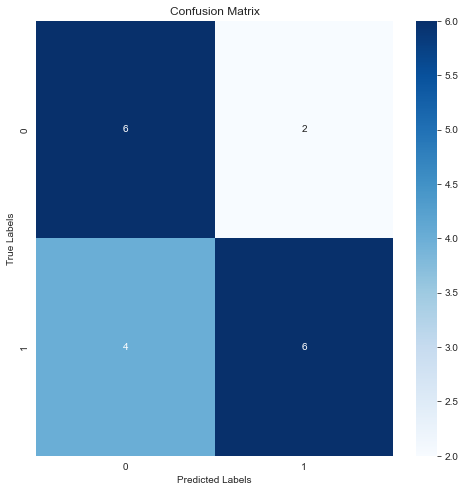

Gradient Boosting on TL57
Accuracy: 0.76
Precision: 0.86
Recall: 0.67
F1-score: 0.75
ROC-AUC score: 0.77


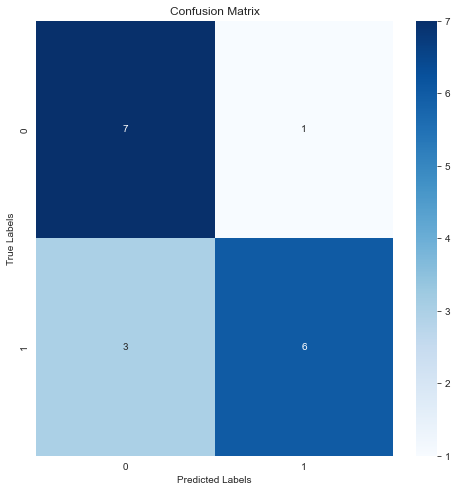

Gradient Boosting on TS39
Accuracy: 0.43
Precision: 0.33
Recall: 0.18
F1-score: 0.24
ROC-AUC score: 0.42


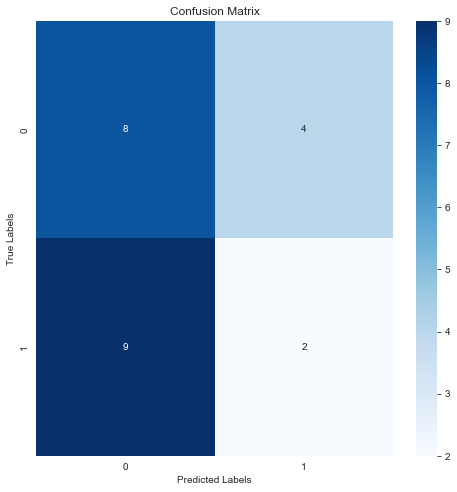

Gradient Boosting on TW82
Accuracy: 0.69
Precision: 0.7
Recall: 0.78
F1-score: 0.74
ROC-AUC score: 0.67


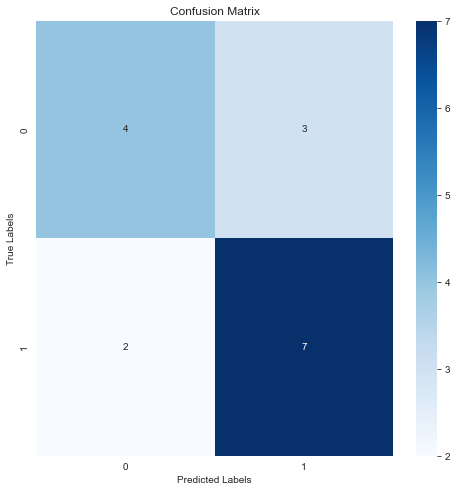

Gradient Boosting on UD25
Accuracy: 0.45
Precision: 0.25
Recall: 0.29
F1-score: 0.27
ROC-AUC score: 0.41


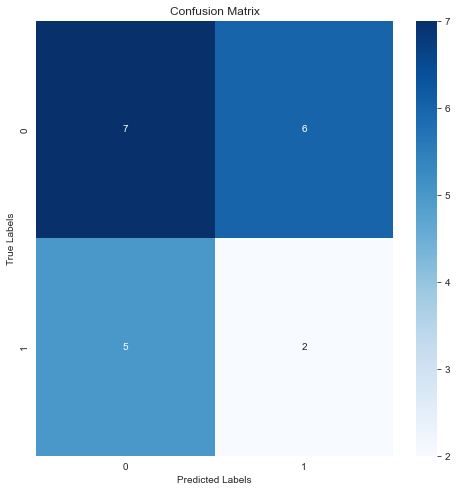

Gradient Boosting on YG31
Accuracy: 0.67
Precision: 0.6
Recall: 0.6
F1-score: 0.6
ROC-AUC score: 0.66


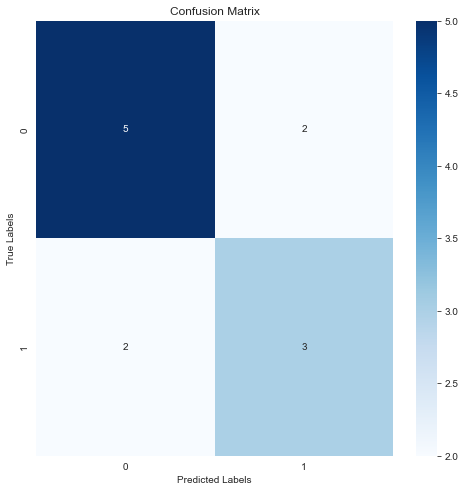

Gradient Boosting on YK24
Accuracy: 0.65
Precision: 0.62
Recall: 0.62
F1-score: 0.62
ROC-AUC score: 0.65


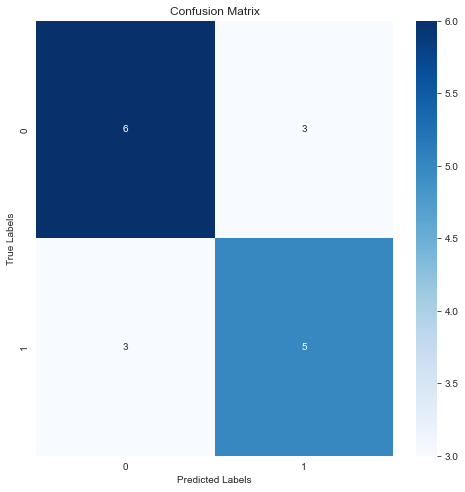

Gradient Boosting on YT92
Accuracy: 0.6
Precision: 0.62
Recall: 0.42
F1-score: 0.5
ROC-AUC score: 0.59


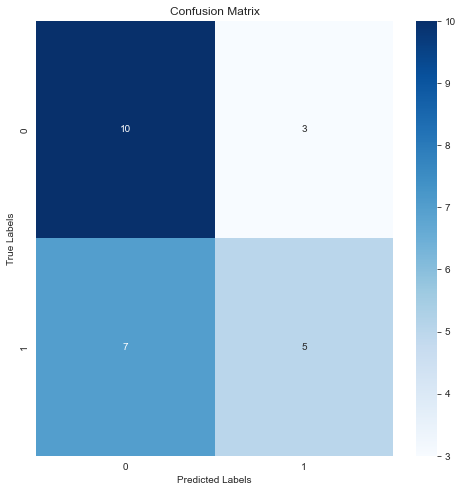

Gradient Boosting on ZF67
Accuracy: 0.78
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.77


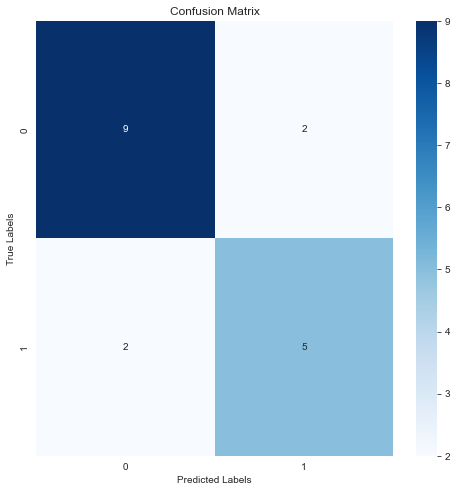

Average accuracy of Gradient Boosting: 0.6005
Average confusion matrix of Gradient Boosting: [[7.      3.15625]
 [4.40625 4.3125 ]]
XGBoost on AE24
Accuracy: 0.56
Precision: 0.67
Recall: 0.44
F1-score: 0.53
ROC-AUC score: 0.58


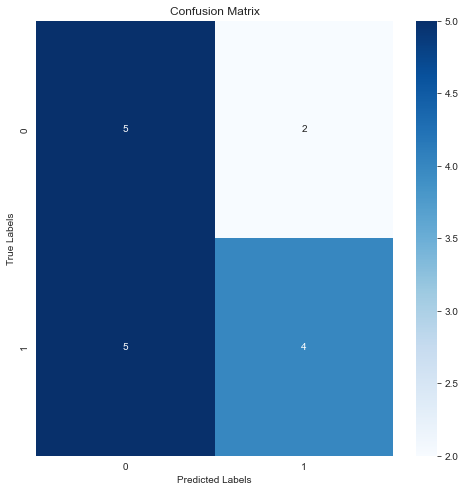

XGBoost on AM32
Accuracy: 0.28
Precision: 0.25
Recall: 0.22
F1-score: 0.24
ROC-AUC score: 0.28


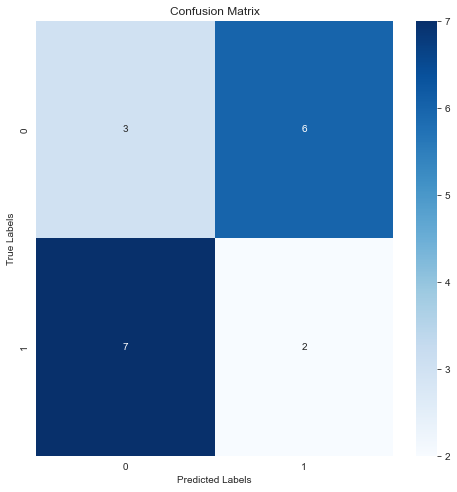

XGBoost on AP21
Accuracy: 0.57
Precision: 0.67
Recall: 0.5
F1-score: 0.57
ROC-AUC score: 0.58


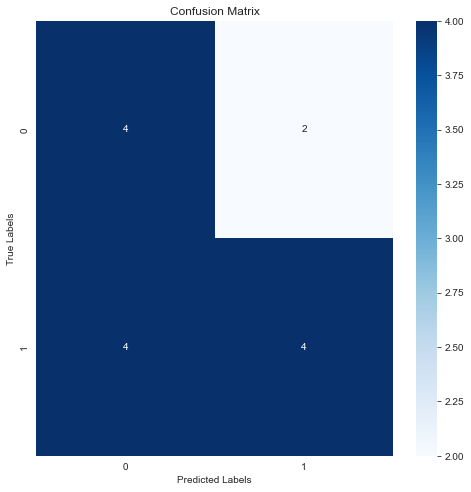

XGBoost on AW35
Accuracy: 0.59
Precision: 0.75
Recall: 0.27
F1-score: 0.4
ROC-AUC score: 0.59


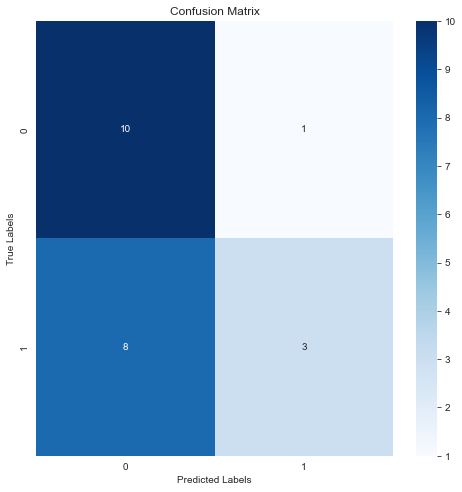

XGBoost on BP55
Accuracy: 0.5
Precision: 0.57
Recall: 0.29
F1-score: 0.38
ROC-AUC score: 0.52


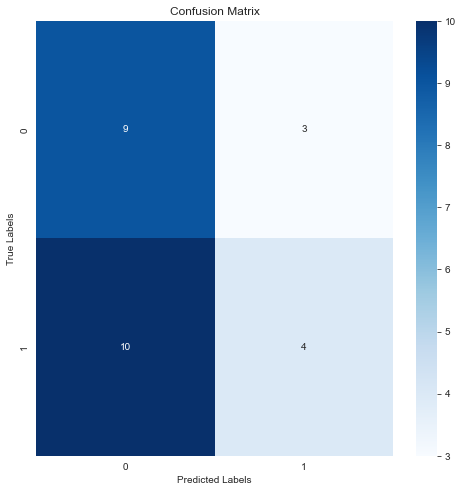

XGBoost on CD91
Accuracy: 0.48
Precision: 0.3
Recall: 0.43
F1-score: 0.35
ROC-AUC score: 0.46


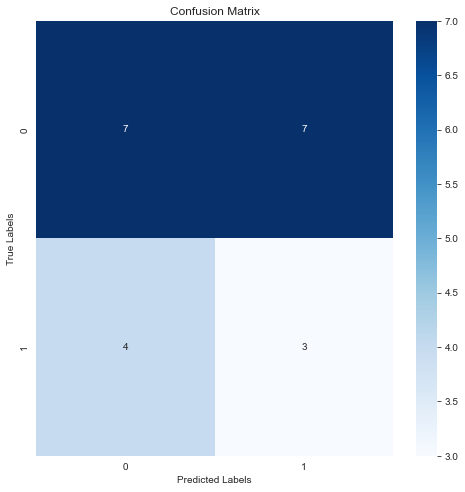

XGBoost on CG62
Accuracy: 0.62
Precision: 0.73
Recall: 0.57
F1-score: 0.64
ROC-AUC score: 0.64


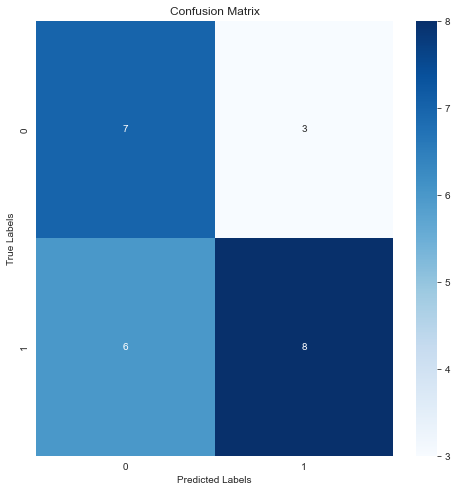

XGBoost on ET81
Accuracy: 0.72
Precision: 0.83
Recall: 0.56
F1-score: 0.67
ROC-AUC score: 0.72


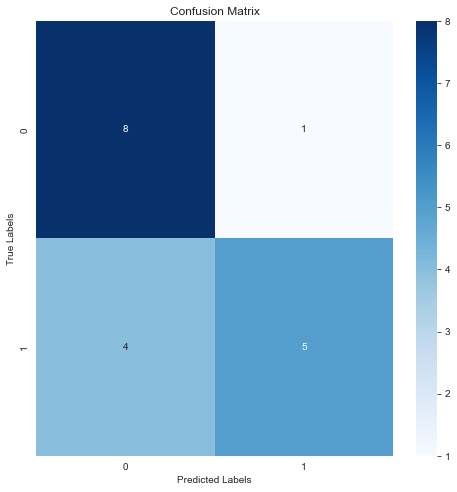

XGBoost on GH44
Accuracy: 0.67
Precision: 0.5
Recall: 0.83
F1-score: 0.62
ROC-AUC score: 0.71


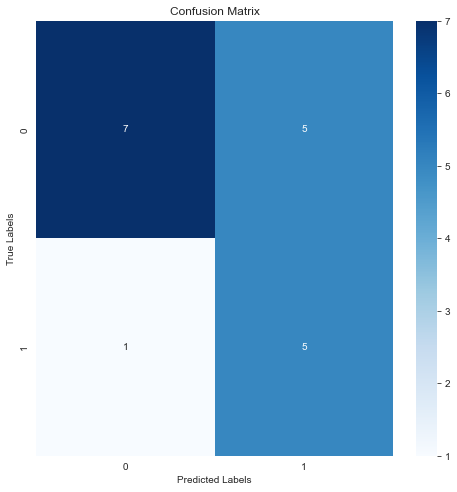

XGBoost on KE46
Accuracy: 0.48
Precision: 0.17
Recall: 0.12
F1-score: 0.14
ROC-AUC score: 0.4


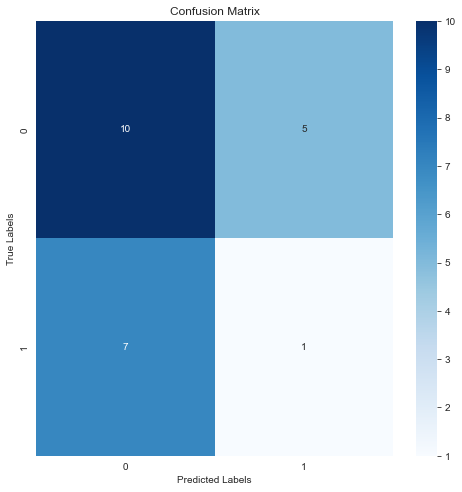

XGBoost on LD74
Accuracy: 0.57
Precision: 0.5
Recall: 0.56
F1-score: 0.53
ROC-AUC score: 0.57


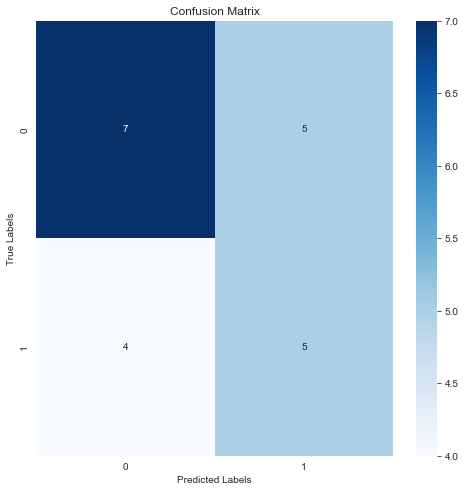

XGBoost on MA36
Accuracy: 0.4
Precision: 0.67
Recall: 0.2
F1-score: 0.31
ROC-AUC score: 0.5


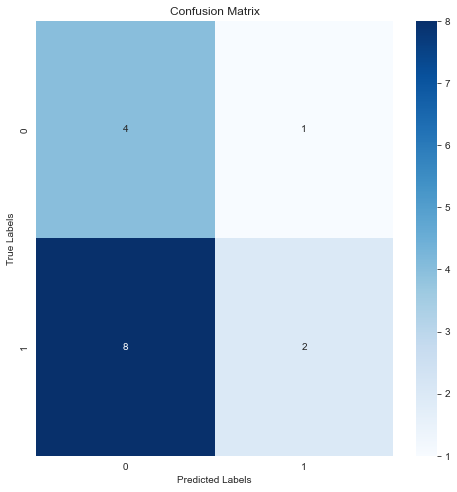

XGBoost on MG07
Accuracy: 0.62
Precision: 0.62
Recall: 0.71
F1-score: 0.67
ROC-AUC score: 0.61


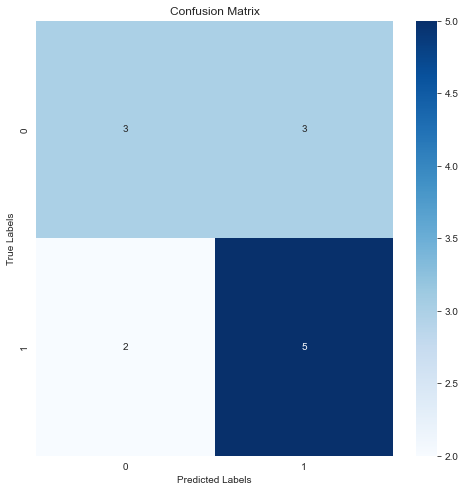

XGBoost on MM08
Accuracy: 0.62
Precision: 0.67
Recall: 0.57
F1-score: 0.62
ROC-AUC score: 0.62


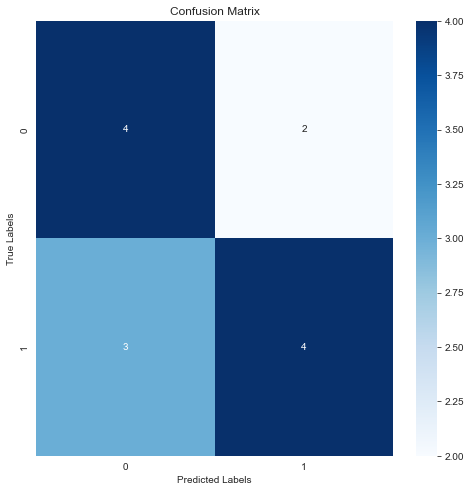

XGBoost on NA43
Accuracy: 0.59
Precision: 0.2
Recall: 0.25
F1-score: 0.22
ROC-AUC score: 0.47


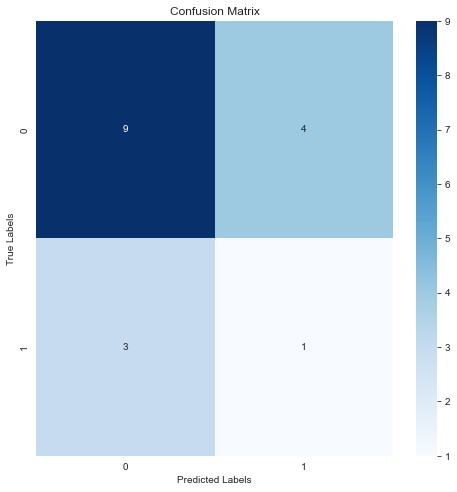

XGBoost on ND46
Accuracy: 0.52
Precision: 0.29
Recall: 0.2
F1-score: 0.24
ROC-AUC score: 0.45


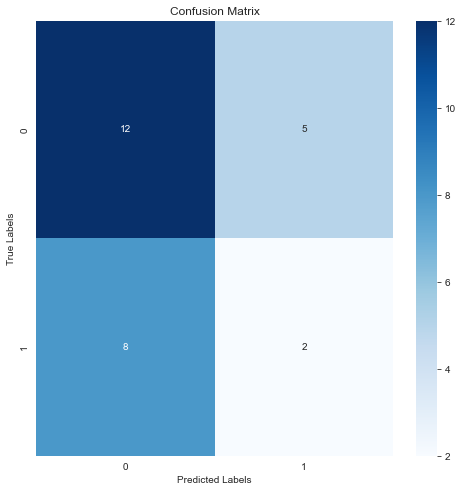

XGBoost on NE69
Accuracy: 0.58
Precision: 0.46
Recall: 0.67
F1-score: 0.55
ROC-AUC score: 0.6


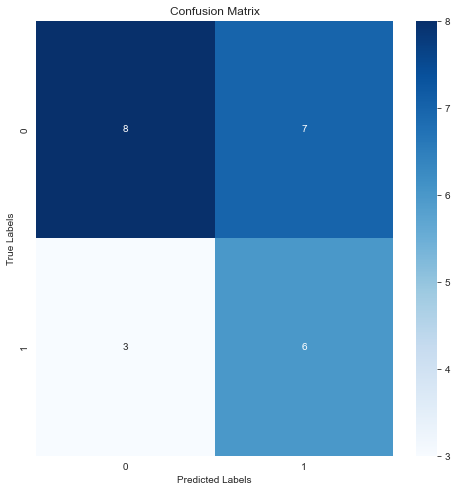

XGBoost on NF76
Accuracy: 0.65
Precision: 0.56
Recall: 0.71
F1-score: 0.63
ROC-AUC score: 0.66


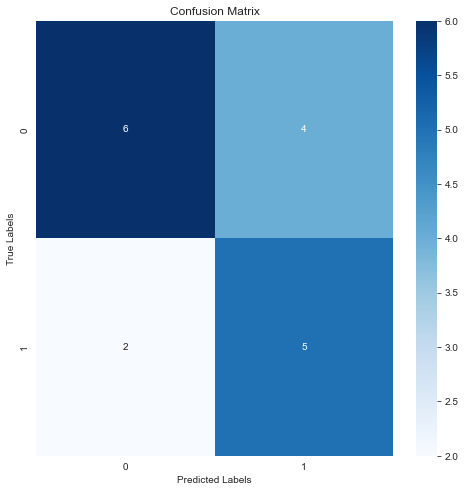

XGBoost on NP15
Accuracy: 0.38
Precision: 0.57
Recall: 0.36
F1-score: 0.44
ROC-AUC score: 0.38


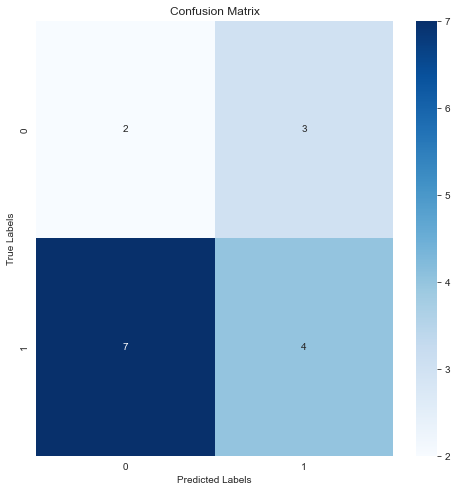

XGBoost on NZ19
Accuracy: 0.76
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.76


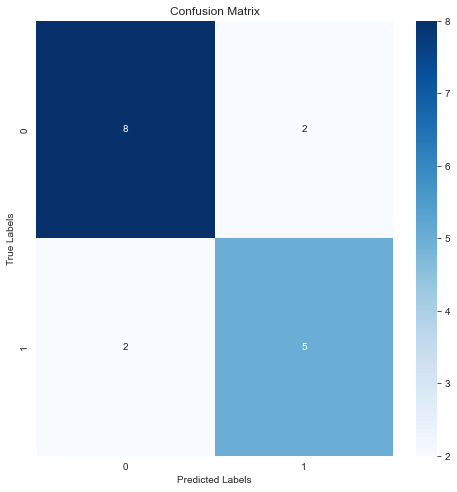

XGBoost on OK15
Accuracy: 0.68
Precision: 0.67
Recall: 0.5
F1-score: 0.57
ROC-AUC score: 0.66


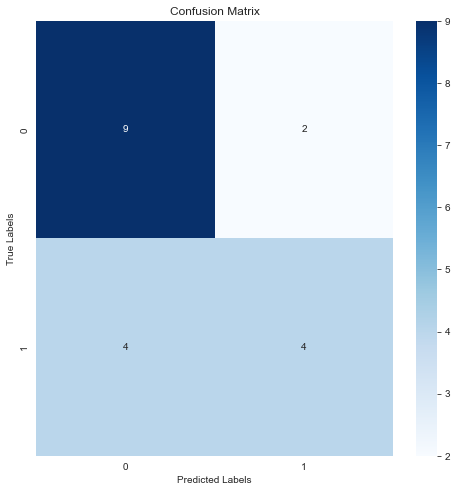

XGBoost on RF42
Accuracy: 0.65
Precision: 0.58
Recall: 0.78
F1-score: 0.67
ROC-AUC score: 0.66


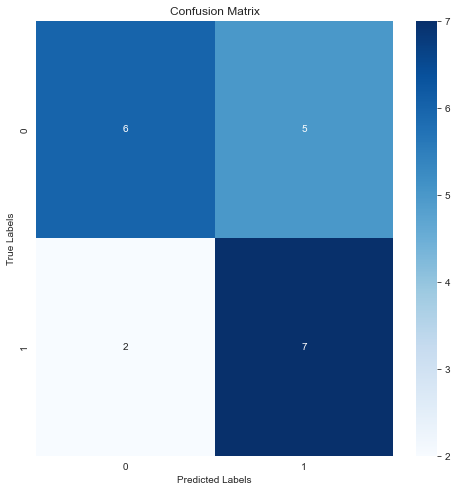

XGBoost on RL69
Accuracy: 0.58
Precision: 0.5
Recall: 0.25
F1-score: 0.33
ROC-AUC score: 0.53


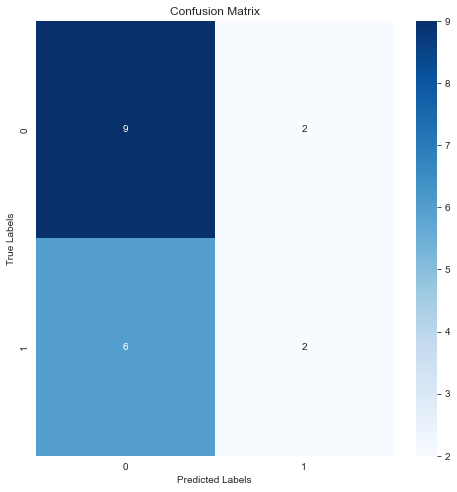

XGBoost on TB29
Accuracy: 0.5
Precision: 0.56
Recall: 0.5
F1-score: 0.53
ROC-AUC score: 0.5


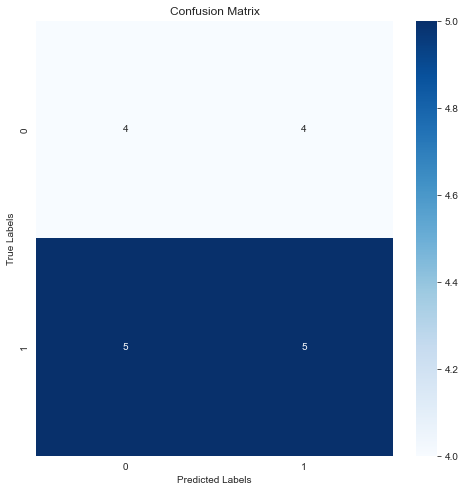

XGBoost on TL57
Accuracy: 0.82
Precision: 1.0
Recall: 0.67
F1-score: 0.8
ROC-AUC score: 0.83


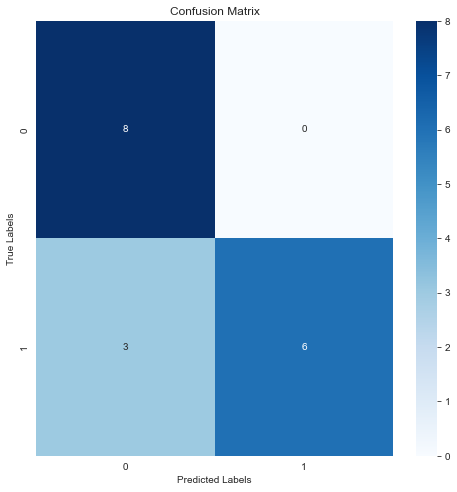

XGBoost on TS39
Accuracy: 0.52
Precision: 0.5
Recall: 0.36
F1-score: 0.42
ROC-AUC score: 0.52


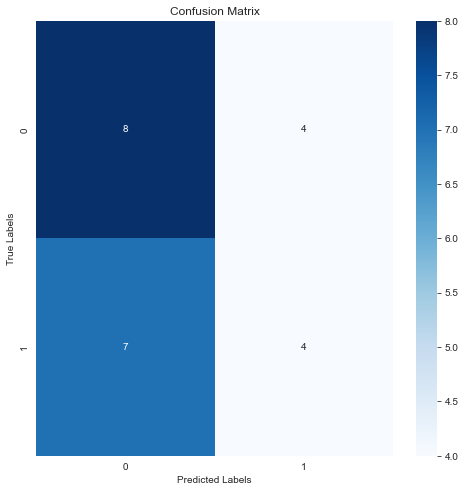

XGBoost on TW82
Accuracy: 0.62
Precision: 0.67
Recall: 0.67
F1-score: 0.67
ROC-AUC score: 0.62


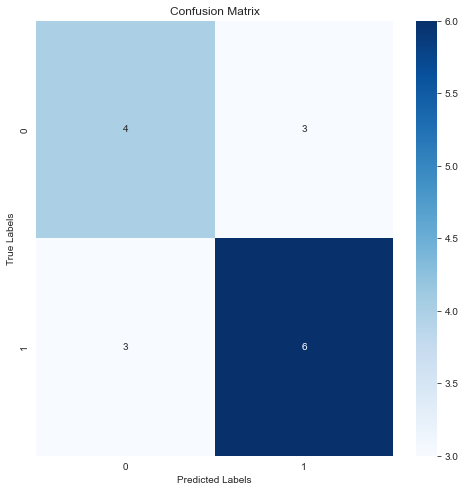

XGBoost on UD25
Accuracy: 0.5
Precision: 0.33
Recall: 0.43
F1-score: 0.38
ROC-AUC score: 0.48


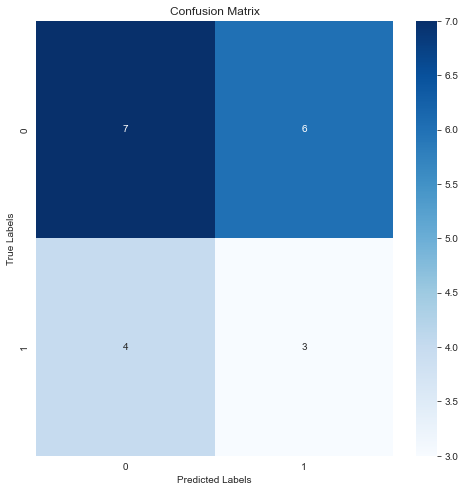

XGBoost on YG31
Accuracy: 0.58
Precision: 0.5
Recall: 0.4
F1-score: 0.44
ROC-AUC score: 0.56


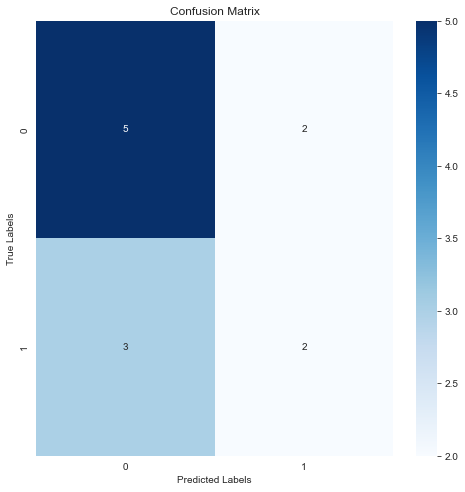

XGBoost on YK24
Accuracy: 0.71
Precision: 0.67
Recall: 0.75
F1-score: 0.71
ROC-AUC score: 0.71


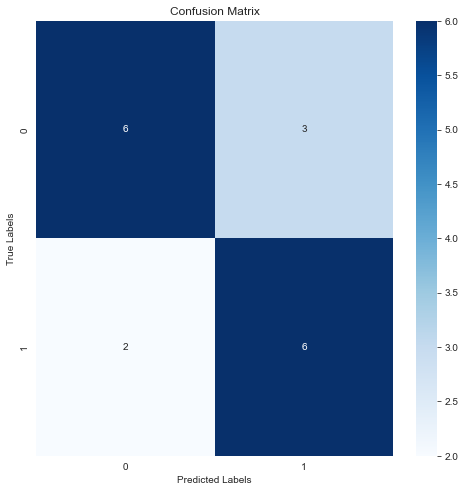

XGBoost on YT92
Accuracy: 0.6
Precision: 0.62
Recall: 0.42
F1-score: 0.5
ROC-AUC score: 0.59


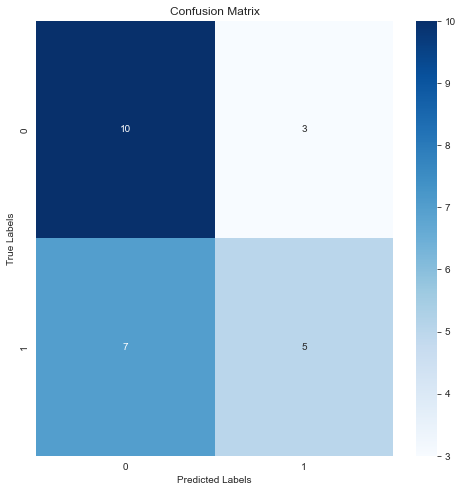

XGBoost on ZF67
Accuracy: 0.78
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.77


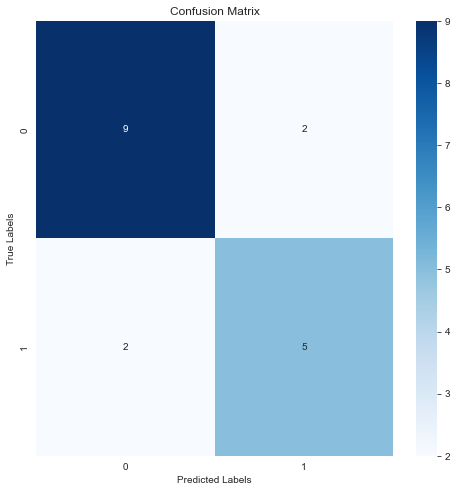

Average accuracy of XGBoost: 0.5844
Average confusion matrix of XGBoost: [[6.8125  3.34375]
 [4.5625  4.15625]]

The best classifier is: Gradient Boosting with accuracy: 0.6005


In [22]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize LeaveOneSubjectOut cross-validator
logo = LeaveOneGroupOut()

# Function to perform LOSO CV and return average accuracy
def evaluate_classifier(model_searcher, X, y, groups, name):
    accuracies = {}
    confusion_matricies = {}
    confidence_intervals = {}
    models = {}

    for train_index, test_index in logo.split(X, y, groups):
        # Extract indices for training and testing data for each participant
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # fill inf values with the mean of the column
        X_train = X_train.replace([np.inf, -np.inf], np.nan)
        X_test = X_test.replace([np.inf, -np.inf], np.nan)
        X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
        X_test = X_test.fillna(X_train.mean())

        # Scale the data
        # Create separate StandardScaler instances
        scaler_x = StandardScaler()
        # Fit on Training Data (!)
        scaler_x.fit(X_train.values)
        # Transform both training and testing data
        X_train_scaled = scaler_x.transform(X_train.values)
        X_test_scaled = scaler_x.transform(X_test.values)
        y_train = y_train.values.reshape(-1, 1).flatten()
        y_test = y_test.values.reshape(-1, 1).flatten()
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

        model_searcher.fit(X_train_scaled, y_train)
        clf = model_searcher.best_estimator_

        # Fit the classifier
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)

        acc = accuracy_score(y_test, y_pred)
        # Store the results for this fold using subject name as key
        subject_name = groups[test_index[0]]
        accuracies[subject_name] = acc
        conf_mat = evaluate_model(f"{name} on {subject_name}", y_test, y_pred)
        confusion_matricies[subject_name] = conf_mat
        models[subject_name] = clf
        confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))

    # return all the computed dictionaries
    return accuracies, confusion_matricies, confidence_intervals, models

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    acc, confusion_matricies, confidence_intervals, models = evaluate_classifier(clf, features_df, labels_df, groups, name)
    avg_confusion_matrix = np.mean(list(confusion_matricies.values()), axis=0)
    avg_acc = np.mean(list(acc.values())) 

    results[name] = avg_acc, avg_confusion_matrix, acc, confusion_matricies, confidence_intervals, models
    print(f"Average accuracy of {name}: {avg_acc:.4f}")
    print(f"Average confusion matrix of {name}: {avg_confusion_matrix}")

# Decision-making (choose the classifier with the highest average accuracy)
best_classifier_name = max(results, key=lambda k: results[k][0])
print(f"\nThe best classifier is: {best_classifier_name} with accuracy: {results[best_classifier_name][0]:.4f}")

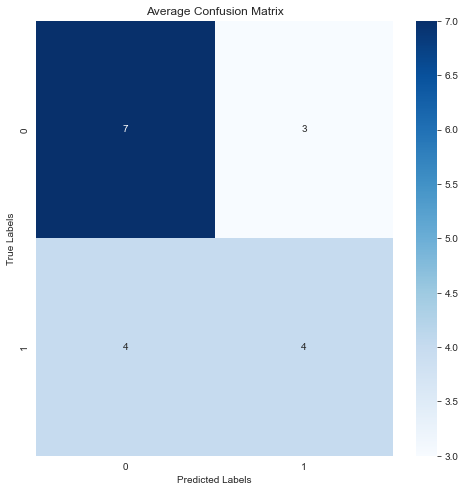

In [23]:
# Plot the average confusion matrix
# round the values in the confusion matrix
avg_confusion_matrix_round = np.round(results[best_classifier_name][1]).astype(int)

# Create a heatmap visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(avg_confusion_matrix_round, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set the axis labels and title
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Average Confusion Matrix")

# Show the plot
plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

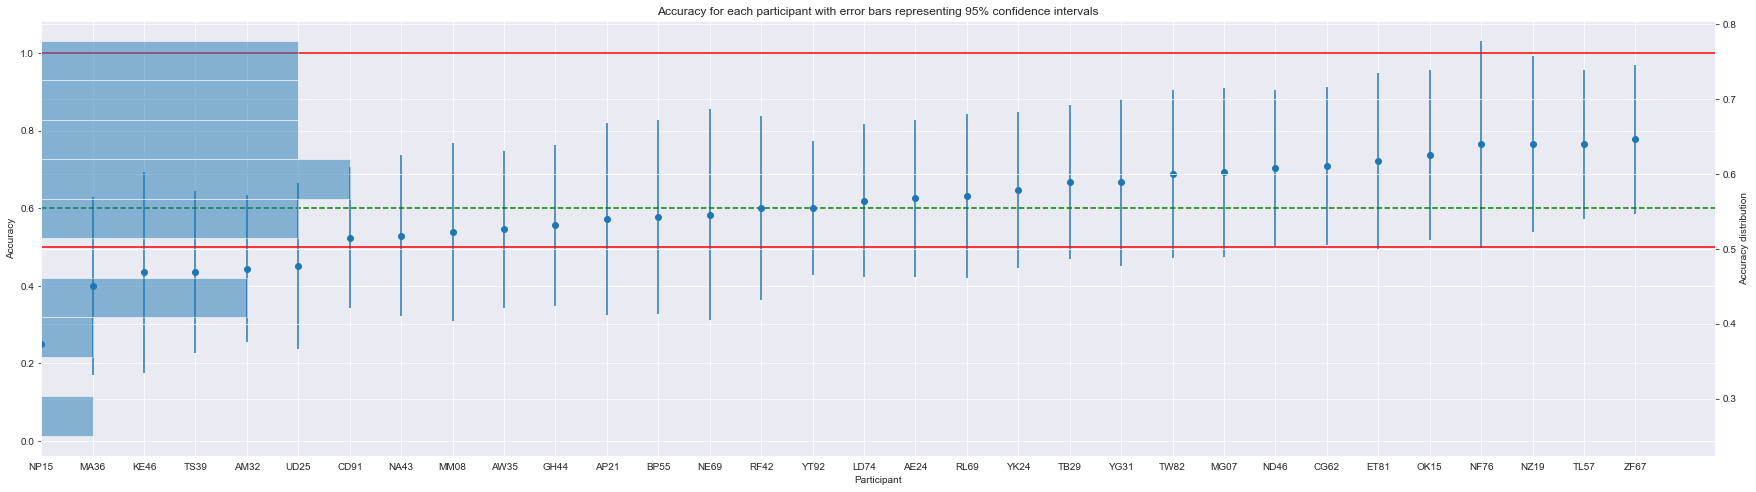

In [24]:
acc = results[best_classifier_name][2]
confidence_intervals = results[best_classifier_name][4]
avg_acc = results[best_classifier_name][0]

# Plot the accuracy for each participant with error bars representing 95% confidence intervals for each participant
fig, ax = plt.subplots(figsize=(30, 8))
# Sort the accuracies dictionary by value (accuracy) and plot the values
ax.errorbar(sorted(acc, key=acc.get), [acc[key] for key in sorted(acc, key=acc.get)], yerr=[(top - bot) / 2 for bot, top in confidence_intervals.values()], fmt='o')
ax.set_xlabel("Participant")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy for each participant with error bars representing 95% confidence intervals")
# Add a horizontal dashed line representing the average accuracy across participants
ax.axhline(y=avg_acc, color='g', linestyle='--')
# Add horizontal lines representing the chance level accuracy (50%) and the perfect accuracy (100%)
ax.axhline(y=0.5, color='r', linestyle='-')
ax.axhline(y=1.0, color='r', linestyle='-')
# Add acuracy distribution on the right side
ax2 = ax.twinx()
ax2.hist([acc[key] for key in sorted(acc, key=acc.get)], bins=10, alpha=0.5, orientation='horizontal')
ax2.set_ylabel("Accuracy distribution")
# Show the plot
plt.show()

Take the best model and train it on the whole dataset

The best model is SVM, so we will train it on the whole dataset, using the average hyperparameters from the LOSO CV

In [25]:
# Get the best model
best_model = results['SVM'][5]

# Go over all the models and average the hyperparameters
best_model_params = {}
for model in best_model.values():
    for param, value in model.get_params().items():
        # If parameter is numeric, add it to the dictionary
        if isinstance(value, (int, float)):
            # if the parameter is already in the dictionary, append the value to the list
            if param in best_model_params:
                best_model_params[param].append(value)
            else:
                best_model_params[param] = [value]
for param, value in best_model_params.items():
    best_model_params[param] = np.mean(value)
    
best_model_params

{'C': 0.3365625,
 'break_ties': 0.0,
 'cache_size': 200.0,
 'coef0': 0.0,
 'degree': 3.0,
 'max_iter': -1.0,
 'probability': 0.0,
 'shrinking': 1.0,
 'tol': 0.001,
 'verbose': 0.0}

svm on whole dataset
Accuracy: 0.72
Precision: 0.81
Recall: 0.51
F1-score: 0.62
ROC-AUC score: 0.7


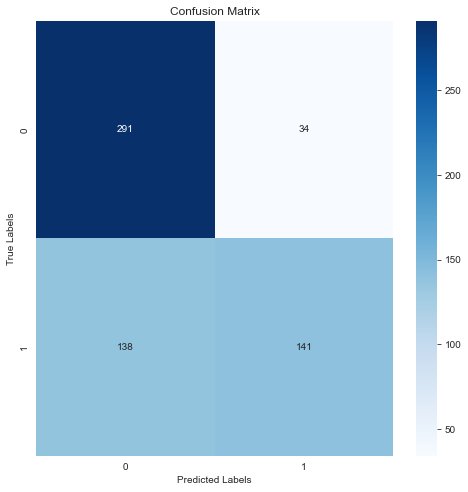

In [26]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
svm = SVC(C=0.446, gamma='scale', kernel='rbf')
svm.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm.predict(X_train_scaled)
acc = accuracy_score(y_train, y_pred)  
conf_mat = evaluate_model(f"svm on whole dataset", y_train, y_pred)


Plot ROC curve

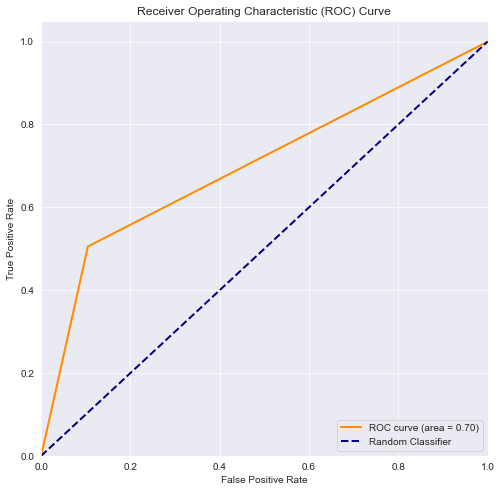

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [28]:
# Get the best model
best_model = results['XGBoost'][5]

# Go over all the models and average the hyperparameters
best_model_params = {}
for model in best_model.values():
    for param, value in model.get_params().items():
        # If parameter is numeric, add it to the dictionary
        if isinstance(value, (int, float)):
            # if the parameter is already in the dictionary, append the value to the list
            if param in best_model_params:
                best_model_params[param].append(value)
            else:
                best_model_params[param] = [value]
for param, value in best_model_params.items():
    best_model_params[param] = np.mean(value)
    
best_model_params

{'enable_categorical': 0.0,
 'learning_rate': 0.16250000000000003,
 'max_depth': 3.34375,
 'missing': nan,
 'n_estimators': 122.5}

xgb on whole dataset
Accuracy: 0.93
Precision: 0.96
Recall: 0.89
F1-score: 0.93
ROC-AUC score: 0.93


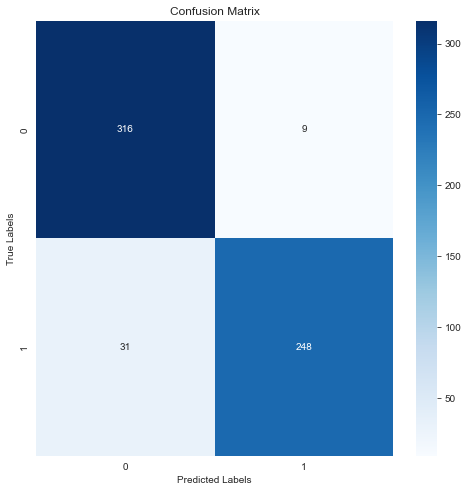

In [29]:
# Train the best model on the whole dataset using the average hyperparameters
X_train = features_df
y_train = labels_df

# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()

# Scale the data
# Create separate StandardScaler instances
scaler_x = StandardScaler()
# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
y_train = y_train.values.reshape(-1, 1).flatten()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# SVM
# Train final model with best hyperparameters
xgb = XGBClassifier(learning_rate=0.1426, max_depth=2, n_estimators=124)
xgb.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = xgb.predict(X_train_scaled)
acc = accuracy_score(y_train, y_pred)  
conf_mat = evaluate_model(f"xgb on whole dataset", y_train, y_pred)


Plot ROC curve

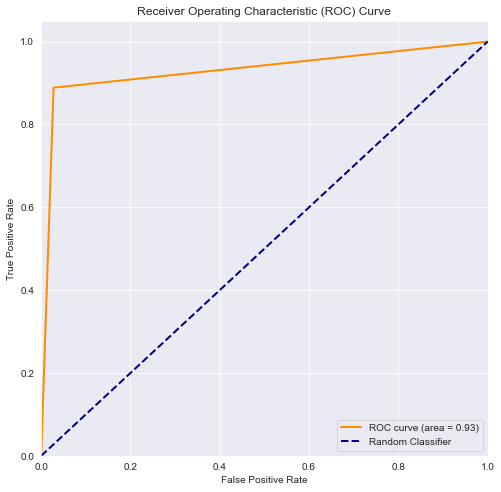

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot ROC curve for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

# Set the limits of the plot to include both curves
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

Feature importance and SHAP values for the best model

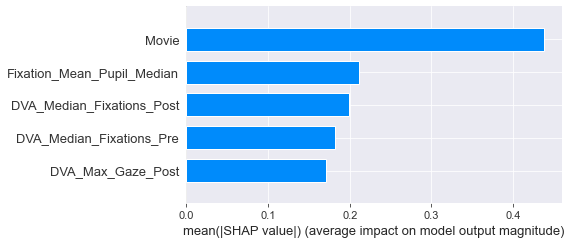

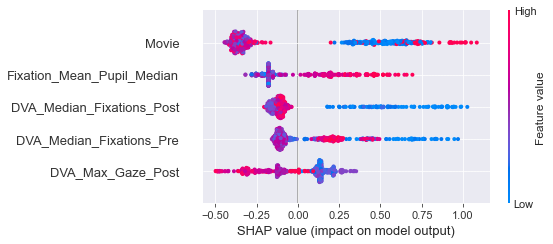

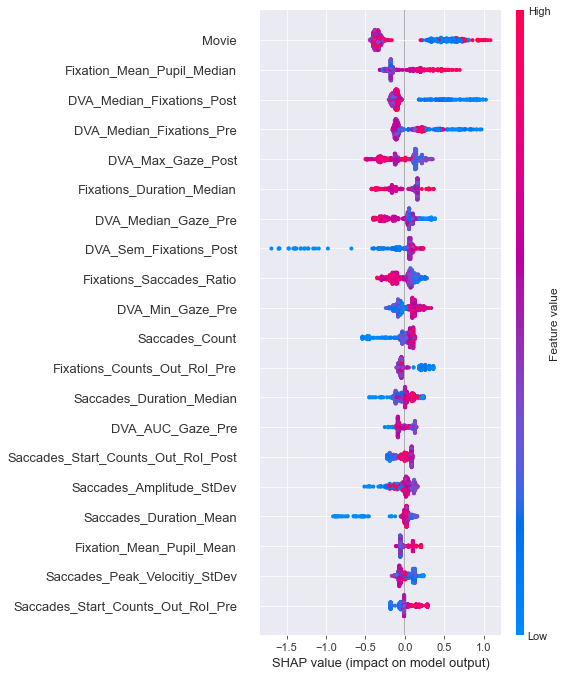

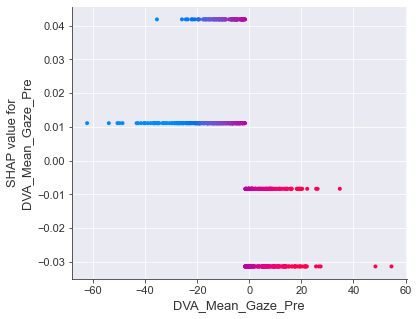

In [31]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb)

# Calculate Shap values
shap_values = explainer.shap_values(X_train_scaled)

# Plot summary plot (feature importance) with the top 5 features
shap.summary_plot(shap_values, X_train_scaled, plot_type="bar", max_display=5)

# Plot summary plot with the top 5 features
shap.summary_plot(shap_values, X_train_scaled, max_display=5)

# Plot force plot with the top 5 features sorted by importance
shap.force_plot(explainer.expected_value, shap_values, X_train_scaled)

# Plot pie plot with all features
shap.summary_plot(shap_values, X_train_scaled)


# Plot dependence plot
shap.dependence_plot('DVA_Mean_Gaze_Pre', shap_values, X_train, interaction_index="DVA_Mean_Gaze_Pre")

In [32]:
# # TabNetClassifier with automatic hyperparameters tuning
# !pip install pytorch-tabnet
# !pip install optuna

In [33]:
# from pytorch_tabnet.tab_model import TabNetClassifier
# import optuna
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import LeaveOneGroupOut
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# 
# # Initialize LeaveOneSubjectOut cross-validator
# logo = LeaveOneGroupOut()
# 
# # Function to perform LOSO CV and return average accuracy
# def evaluate_tabnet(X, y, groups):
#     tabnet_accuracies = {}
#     tabnet_confusion_matricies = {}
#     tabnet_confidence_intervals = {}
#     tabnet_models = {}
# 
#     for train_index, test_index in logo.split(X, y, groups):
#         # Extract indices for training and testing data for each participant
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#         
#         # fill inf values with the mean of the column
#         X_train = X_train.replace([np.inf, -np.inf], np.nan)
#         X_test = X_test.replace([np.inf, -np.inf], np.nan)
#         X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
#         X_test = X_test.fillna(X_train.mean())
#         
#         # Scale the data
#         # Create separate StandardScaler instances
#         scaler_x = StandardScaler()
#         # Fit on Training Data (!)
#         scaler_x.fit(X_train.values)
#         # Transform both training and testing data
#         X_train_scaled = scaler_x.transform(X_train.values)
#         X_test_scaled = scaler_x.transform(X_test.values)
#         y_train = y_train.values.reshape(-1, 1).flatten()
#         y_test = y_test.values.reshape(-1, 1).flatten()
#         X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#         X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
#         
#         # TABNET
#         # Convert Pandas DataFrame to NumPy array
#         X_train_np = X_train_scaled.values
#         X_test_np = X_test_scaled.values
#         
#         # Define objective function for optuna
#         def objective(trial):
#             # Generate hyperparameter search space
#             params = {
#                 'n_d': trial.suggest_int('n_d', 10, 50),
#                 'n_a': trial.suggest_int('n_a', 10, 50),
#                 'n_steps': trial.suggest_int('n_steps', 1, 19),
#                 'gamma': trial.suggest_float('gamma', 0.1, 2.0),
#                 'n_independent': trial.suggest_int('n_independent', 1, 10),
#                 'n_shared': trial.suggest_int('n_shared', 1, 10),
#                 'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
#                 'verbose': 0
#             }
#         
#             # Create TabNetClassifier object with hyperparameters from optuna
#             classifier = TabNetClassifier(**params)
#         
#             # Train and evaluate the model
#             classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
#             val_preds = classifier.predict_proba(X_test_np)[:, 1]
#             val_auc = roc_auc_score(y_test, val_preds)
#         
#             return val_auc
#         
#         # Create optuna study
#         study = optuna.create_study(direction='maximize')
#         
#         # Optimize hyperparameters using optuna
#         study.optimize(objective, n_trials=42, timeout=600)
#         
#         # Get best hyperparameters from optuna
#         best_params = study.best_trial.params
#         print('Best trial: score {},\nparams {}'.format(study.best_trial.value, study.best_trial.params))
#         
#         # Train final model with best hyperparameters
#         tabnet = TabNetClassifier(**best_params)
#         tabnet.fit(X_train_np, y_train)
# 
#         # Evaluate the model
#         y_pred = tabnet.predict(X_test_np)
#         acc = accuracy_score(y_test, y_pred)
#         
#         # Store the results for this fold using subject name as key
#         subject_name = groups[test_index[0]]
#         tabnet_accuracies[subject_name] = acc
#         conf_mat = evaluate_model(f"Tabnet on {subject_name}", y_test, y_pred)
#         tabnet_confusion_matricies[subject_name] = conf_mat
#         tabnet_models[subject_name] = tabnet
#         tabnet_confidence_intervals[subject_name] = (acc - 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)), acc + 1.96 * np.sqrt(acc * (1 - acc) / len(y_test)))
#         
#     # return all the computed dictionaries
#     return tabnet_accuracies, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models
# 
# # Evaluate
# tabnet_acc, tabnet_confusion_matricies, tabnet_confidence_intervals, tabnet_models = evaluate_tabnet(features_df, labels_df, groups)
# 
# tabnet_avg_confusion_matrix = np.mean(list(tabnet_confusion_matricies.values()), axis=0)
# tabnet_avg_acc = np.mean(list(tabnet_acc.values())) 
# 
# print(f"Tabnet Average accuracy: {tabnet_avg_acc:.4f}")
# print(f"Tabnet   Average confusion matrix: {tabnet_avg_confusion_matrix}")

In [34]:
# # Plot the average confusion matrix
# # round the values in the confusion matrix
# tabnet_avg_confusion_matrix_round = np.round(tabnet_avg_confusion_matrix).astype(int)
# 
# # Create a heatmap visualization of the confusion matrix 
# fig, ax = plt.subplots(figsize=(8, 8))
# sns.heatmap(tabnet_avg_confusion_matrix_round, annot=True, cmap="Blues", fmt="d", ax=ax)
# 
# # Set the axis labels and title
# ax.set_xlabel("Predicted Labels")
# ax.set_ylabel("True Labels")
# ax.set_title("Average Confusion Matrix")
# 
# # Show the plot
# plt.show()

Calculating Performance Across Participants (Subject-wise)

The Y-axis can represent the accuracy for each participant, i.e., the percentage of correct classifications. This is the most direct measure of classifier performance and would be readily interpretable by most readers. We can use error bars to represent confidence intervals for each participant's accuracy.

In [35]:
# # Plot the accuracy for each participant with error bars representing 95% confidence intervals for each participant
# fig, ax = plt.subplots(figsize=(30, 8))
# ax.errorbar(tabnet_acc.keys(), tabnet_acc.values(), yerr=[(top - bot) / 2 for bot, top in tabnet_confidence_intervals.values()], fmt='o')
# ax.set_xlabel("Participant")
# ax.set_ylabel("Accuracy")
# ax.set_title("Accuracy for each participant with error bars representing 95% confidence intervals")
# # Add a horizontal dashed line representing the average accuracy across participants
# ax.axhline(y=tabnet_avg_acc, color='g', linestyle='--')
# # Add horizontal lines representing the chance level accuracy (50%)
# ax.axhline(y=0.5, color='r', linestyle='-')
# # Show the plot
# plt.show()

The best model is Tabnet, so we will train it on the whole dataset
and then we will plot the feature importance and the SHAP values

In [36]:
# # Go over all the models and average the hyperparameters
# best_model_params = {}
# for model in tabnet_models.values():
#     for param, value in model.get_params().items():
#         # If parameter is numeric, add it to the dictionary
#         if isinstance(value, (int, float)):
#             # if the parameter is already in the dictionary, append the value to the list
#             if param in best_model_params:
#                 best_model_params[param].append(value)
#             else:
#                 best_model_params[param] = [value]
# for param, value in best_model_params.items():
#     best_model_params[param] = np.mean(value)
#     
# best_model_params

In [37]:
# X_train = features_df
# y_train = labels_df
# 
# # fill inf values with the mean of the column
# X_train = X_train.replace([np.inf, -np.inf], np.nan)
# X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
# 
# # Scale the data
# # Create separate StandardScaler instances
# scaler_x = StandardScaler()
# # Fit on Training Data (!)
# scaler_x.fit(X_train.values)
# # Transform both training and testing data
# X_train_scaled = scaler_x.transform(X_train.values)
# y_train = y_train.values.reshape(-1, 1).flatten()
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# 
# # TABNET
# # Convert Pandas DataFrame to NumPy array
# X_train_np = X_train_scaled.values
# 
# 
# # Train final model with best hyperparameters
# all_training_model = TabNetClassifier(n_d=35, n_a=41, n_steps=10, gamma=0.85, n_independent=6, n_shared=5, lambda_sparse=0.0432, verbose=0)
# all_training_model.fit(X_train_np, y_train)
# 
# # Evaluate the model
# y_pred = all_training_model.predict(X_train_np)
# acc = accuracy_score(y_train, y_pred)
# conf_mat = evaluate_model(f"Tabnet on whole dataset", y_train, y_pred)

Feature importance

In [38]:
# feature_importances = pd.DataFrame(all_training_model.feature_importances_,
#                                    index = X_train.columns,
#                                     columns=['importance']).sort_values('importance', ascending=False)
# feature_importances = feature_importances

More feature importance plots

In [39]:
# # Plot feature importance
# feature_importances.plot.bar(figsize=(20, 8))
# plt.show()
# 
# # Plot feature importance
# feature_importances.plot.barh(figsize=(20, 8))
# plt.show()
# 
# # Plot feature importance
# feature_importances.plot.pie(figsize=(20, 20), subplots=True)
# plt.show()